# Final Group 6

## Ask 1 Acquire Dataset 

### Dataset Description & Source

+ Given the global changes that have occurred as a result of the COVID-19 pandemic, our group decided to focus on COVID-19 data to assess the virus’ impact on our community. For the purposes of this project, we utilized Google’s COVID-19 Open Health Data. Access to the raw data and relevant csv links is available here:  https://health.google.com/covid-19/open-data/raw-data.

+ There are 19 tables in this repository, and clicking on the table name provides access to the data dictionary for each table. The table names are: Aggregated, Index, Demographics, Economy, Epidemiology, Emergency Declarations, Geography, Health, Hospitalizations, Mobility, Search Trends, Vaccination Access, Vaccination Search, Vaccinations, Government Response, Weather, World Bank, Age, and Sex. The data in this set is aggregated from a variety of sources to provide key demographic insights and offers information on the virus’ mortality, level of contagion, and vaccine efficacy. Additionally, the set contains information on socioeconomic determinants that impact patient and hospital outcomes. There is data on over 20,000 locations according to the site, with specific geographic codes for the country as well as a region, state, or county within a given country. The dataset was last updated on September 15th 2022, and real time updates in the repository have been turned off after that point. There are over 300 M rows in the data set



### Data Attractiveness


+ The dataset is attractive because Google has accumulated data from a variety of sources to create a master data source on COVID virus information from 2020 to 2022. In fact, the repository contains tabular data from WikiData, Eurostat, Datacommons, Law Atlas Project, Google, University of Oxford, NOAA, and the WorldBank. The data is important because it offers insights into how geographic locations have responded to the virus, what areas have had high cases, deaths and hospitalizations as well as other information. Governments and world leaders can use the data to understand the best ways to respond to the pandemic, prevent cases, and improve health outcomes given a country’s particular characteristics.  Every row in the data set represents one day and has a corresponding location. The data is easily accessible via JSON or csv format.



### Dimensional Modeling Appropriateness

+ The dataset is suitable for dimensional modeling and analytical analysis. There are several numeric attributes which fit clearly for fact tables like hospitalizations, new cases, deaths, government response stringency score etc. There are three primary dimensions to subset on: Time, Location, and Government Response. Time can be subdivided into date, day, year, month, day of week, weekend etc. Location can be divided into country, region, sub region continent for example. Government response has a variety of levels for its 22 columns which all have different levels to subset on

### Questions


+ There are several questions that may be asked using the COVID open data repository. Our first question is to understand how stringency index changes over time for countries with similar economic capabilities. We intend on subsetting our data into countries with the top 10 GDP as a measure of their country's strength and ability to invoke policy changes. We will expand on this question by exploring the relationship between stringency and cases and deaths for those countries.

+ Our second question is focused on understanding if certain contentious policies are effective government responses during a pandemic. For this question we will focus on the effectiveness of required face coverings, stay at home orders, and international travel restrictions as well as their various levels for the subset of countries.

+ Lastly, we want to understand how vaccination policy and vaccination rates are related and gain a broader understanding of the impact of vaccinations on hospitalizations and serious COVID cases for a particular country.


### Data Concerns

+ Our primary concern with the data pertains to its total size. There are 19 tables with rows in each ranging from 10k  rows to approximately 300 M rows. This means that the data in its aggregated form as listed on Google is too large to load and view on our AWS instance and cannot be opened in excel or basic computer files. We opted to select only some columns and rows from the data sources to make our analysis more focused. Specifically, we chose to only look at data from the years of 2020 and 2021 to capture the initial impact of the pandemic and adjustments. Additionally, it is challenging to aggregate all of our data into one single source that we can query. It is difficult to join multiple datasets together on a common key and while most have a date and location as a key, not every dataset has date rows, meaning joins might not find exact matches. Finally, we expect some issues with the collection and recording of the data. Countries record data very differently and some information may not be available for every country of interest. Similarly, data collection might not be as good in the beginning of the pandemic due to the newness of the illness, lack of testing, vaccination and knowledge of what constitutes COVID related sickness or death. We also want to note that while some measures might be associated with each other, like vaccination rates and cases, we cannot draw causal inferences without more in depth analysis and information. The data is also for a variety of places with different populations so the information is not standardized per capita or per 1000. We expect this to be challenging in our analysis to ensure we are comparing locations with appropriate metrics.


## ASK 2: Data Wrangling

### Loading Data

+ In its current state, the data is too large to manage and work with. Our first step we took was reducing the information to only key measures that we could use to complete our analysis. First we loaded the data into our instance using !wget with the https:// link and checked the headers of each table using !xsv headers table.csv. We did this for the tables epidemiology, demographics, hospitalizations, vaccinations, government response, by sex, economy, health and index. This significantly reduced our storage and space compared to the aggregated set of all tables. 

Load epidemiology csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv

--2022-12-02 02:01:07--  https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.251.16.128, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 520931512 (497M) [text/csv]
Saving to: ‘epidemiology.csv’

epidemiology.csv    100%[===================>] 496.80M   106MB/s    in 4.7s    

2022-12-02 02:01:11 (105 MB/s) - ‘epidemiology.csv’ saved [520931512/520931512]



Check the headers of epidemiology csv

In [ ]:
!xsv headers epidemiology.csv

1   date
2   location_key
3   new_confirmed
4   new_deceased
5   new_recovered
6   new_tested
7   cumulative_confirmed
8   cumulative_deceased
9   cumulative_recovered
10  cumulative_tested


Load Demographics csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/demographics.csv

--2022-12-02 02:01:12--  https://storage.googleapis.com/covid19-open-data/v3/demographics.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1544607 (1.5M) [text/csv]
Saving to: ‘demographics.csv’

demographics.csv    100%[===================>]   1.47M  --.-KB/s    in 0.03s   

2022-12-02 02:01:12 (46.0 MB/s) - ‘demographics.csv’ saved [1544607/1544607]



Check the headers of demographics csv

In [ ]:
!xsv headers demographics.csv

1   location_key
2   population
3   population_male
4   population_female
5   population_rural
6   population_urban
7   population_largest_city
8   population_clustered
9   population_density
10  human_development_index
11  population_age_00_09
12  population_age_10_19
13  population_age_20_29
14  population_age_30_39
15  population_age_40_49
16  population_age_50_59
17  population_age_60_69
18  population_age_70_79
19  population_age_80_and_older


Load Hospitalizations csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/hospitalizations.csv

--2022-12-02 02:01:12--  https://storage.googleapis.com/covid19-open-data/v3/hospitalizations.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66428667 (63M) [text/csv]
Saving to: ‘hospitalizations.csv’

hospitalizations.cs 100%[===================>]  63.35M  95.2MB/s    in 0.7s    

2022-12-02 02:01:13 (95.2 MB/s) - ‘hospitalizations.csv’ saved [66428667/66428667]



Check the headers of hospitalizations.csv

In [ ]:
!xsv headers hospitalizations.csv

1   date
2   location_key
3   new_hospitalized_patients
4   cumulative_hospitalized_patients
5   current_hospitalized_patients
6   new_intensive_care_patients
7   cumulative_intensive_care_patients
8   current_intensive_care_patients
9   new_ventilator_patients
10  cumulative_ventilator_patients
11  current_ventilator_patients


Load Vaccinations csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv

--2022-12-02 02:01:23--  https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164305510 (157M) [text/csv]
Saving to: ‘vaccinations.csv’

vaccinations.csv    100%[===================>] 156.69M  95.3MB/s    in 1.6s    

2022-12-02 02:01:25 (95.3 MB/s) - ‘vaccinations.csv’ saved [164305510/164305510]



Check the headers of Vaccinations csv

In [ ]:
!xsv headers vaccinations.csv

1   date
2   location_key
3   new_persons_vaccinated
4   cumulative_persons_vaccinated
5   new_persons_fully_vaccinated
6   cumulative_persons_fully_vaccinated
7   new_vaccine_doses_administered
8   cumulative_vaccine_doses_administered
9   new_persons_vaccinated_pfizer
10  cumulative_persons_vaccinated_pfizer
11  new_persons_fully_vaccinated_pfizer
12  cumulative_persons_fully_vaccinated_pfizer
13  new_vaccine_doses_administered_pfizer
14  cumulative_vaccine_doses_administered_pfizer
15  new_persons_vaccinated_moderna
16  cumulative_persons_vaccinated_moderna
17  new_persons_fully_vaccinated_moderna
18  cumulative_persons_fully_vaccinated_moderna
19  new_vaccine_doses_administered_moderna
20  cumulative_vaccine_doses_administered_moderna
21  new_persons_vaccinated_janssen
22  cumulative_persons_vaccinated_janssen
23  new_persons_fully_vaccinated_janssen
24  cumulative_persons_fully_vaccinated_janssen
25  new_vaccine_doses_administered_janssen
26  cumulative_vaccine_doses_administered_

Load Government response csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv

--2022-12-02 02:01:25--  https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17676542 (17M) [text/csv]
Saving to: ‘oxford-government-response.csv’

oxford-government-r 100%[===================>]  16.86M  67.1MB/s    in 0.3s    

2022-12-02 02:01:26 (67.1 MB/s) - ‘oxford-government-response.csv’ saved [17676542/17676542]



Check the headers of Government response csv

In [ ]:
!xsv headers oxford-government-response.csv

1   date
2   location_key
3   school_closing
4   workplace_closing
5   cancel_public_events
6   restrictions_on_gatherings
7   public_transport_closing
8   stay_at_home_requirements
9   restrictions_on_internal_movement
10  international_travel_controls
11  income_support
12  debt_relief
13  fiscal_measures
14  international_support
15  public_information_campaigns
16  testing_policy
17  contact_tracing
18  emergency_investment_in_healthcare
19  investment_in_vaccines
20  facial_coverings
21  vaccination_policy
22  stringency_index


Load By sex csv

Load Economy csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/economy.csv

--2022-12-02 02:01:42--  https://storage.googleapis.com/covid19-open-data/v3/economy.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10228 (10.0K) [text/csv]
Saving to: ‘economy.csv’

economy.csv         100%[===================>]   9.99K  --.-KB/s    in 0s      

2022-12-02 02:01:42 (63.4 MB/s) - ‘economy.csv’ saved [10228/10228]



Check the headers of Economy csv

In [ ]:
!xsv headers economy.csv

1   location_key
2   gdp_usd
3   gdp_per_capita_usd
4   human_capital_index


Load Health csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/health.csv

--2022-12-02 02:01:42--  https://storage.googleapis.com/covid19-open-data/v3/health.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122072 (119K) [text/csv]
Saving to: ‘health.csv’

health.csv          100%[===================>] 119.21K  --.-KB/s    in 0.005s  

2022-12-02 02:01:42 (22.0 MB/s) - ‘health.csv’ saved [122072/122072]



Check the headers of Health csv

In [ ]:
!xsv headers health.csv

1   location_key
2   life_expectancy
3   smoking_prevalence
4   diabetes_prevalence
5   infant_mortality_rate
6   adult_male_mortality_rate
7   adult_female_mortality_rate
8   pollution_mortality_rate
9   comorbidity_mortality_rate
10  hospital_beds_per_1000
11  nurses_per_1000
12  physicians_per_1000
13  health_expenditure_usd
14  out_of_pocket_health_expenditure_usd


Load Index csv

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/index.csv

--2022-12-02 02:01:42--  https://storage.googleapis.com/covid19-open-data/v3/index.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2426323 (2.3M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   2.31M  --.-KB/s    in 0.05s   

2022-12-02 02:01:42 (47.1 MB/s) - ‘index.csv’ saved [2426323/2426323]



Check the headers of Index csv

In [ ]:
!xsv headers index.csv

1   location_key
2   place_id
3   wikidata_id
4   datacommons_id
5   country_code
6   country_name
7   subregion1_code
8   subregion1_name
9   subregion2_code
10  subregion2_name
11  locality_code
12  locality_name
13  iso_3166_1_alpha_2
14  iso_3166_1_alpha_3
15  aggregation_level


### Subsetting Data

+ Next we subsetted select columns from our uploaded csv tables to choose only the columns that were necessary for analysis. We used !csvcut -c to select certain columns and then piped the selected columns into a new csv file for our tables to later be used when creating our SQL database. 


#### Epidemiology


+ For epidemiology we kept columns 1-5 and omitted the columns that were cumulative counts of confirmed cases, deceased, recovered and tested. We chose to do so because we will be looking at multiple days at a time and summing cumulative measures will give us an overestimate for a location on cases, deaths etc.


In [ ]:
!csvcut -c 1,2,3,4,5 epidemiology.csv > epidemiologyn.csv

#### Demographics


+ For demographics we kept columns 1-4 and omitted the remaining information. While age information and population information is helpful, our final question focuses mainly on gender differences. For our project it is most useful to just keep information on male and female population to answer our questions although the other information could be helpful in other future analyses.


In [ ]:
!csvcut -c 1,2,3,4 demographics.csv > demographicsn.csv

#### Hospitalizations


+ For the hospitalizations table we kept columns 1-3,5,6,8,9,11, only omitting the cumulative hospitalized patients, cumulative ICU patients, and cumulative ventilator patients. Again we are able to find the cumulative information on our own with the day to day information.

In [ ]:
!csvcut -c 1,2,3,5,6,8,9,11 hospitalizations.csv > hospitalizationsn.csv

#### Vaccinations


+ For the vaccinations table we kept columns 1-3,5,7 which include date, location, new vaccinated persons, new full vaccinated persons, new vaccine doses administered. The remaining information is focused on brand specific doses for vaccines and cumulative counts. Again, while the information is helpful, we have location based data not patient data and are unable to determine what deaths and hospitalizations are of those with different vaccine types. 

In [ ]:
!csvcut -c 1,2,3,5,7 vaccinations.csv > vaccinationsn.csv

#### Government Response


+ For the government response table we chose to keep all 22 columns. This is because each column provides a level to subset on and all columns contribute to the stringency score that a country is assigned to. Additionally, for our first question we want to ensure we can see all of the policy decisions a particular location had in place at a given time.


In [ ]:
!csvcut -c 1-22 oxford-government-response.csv > oxford-government-responsen.csv

#### By Sex


+ For the by sex column we kept the information on everything, except the cumulative counts. So we omitted cumulative confirmed male/female cases, cumulative deceased male/female cases, cumulative recovered male/female cases, cumulative tested male/female cases, cumulative hospitalized, ICU and ventilator cases for male/female.

In [ ]:
!csvcut -c 1,2,3,4,7,8,11,12,15,16,19,20,23,24,27,28 by-sex.csv > by-sexn.csv

#### Economy


+ For the economy table we kept just the first two columns which were location and GDP. We chose to omit GDP per capita and human capital index because we only intend on using the economy table to further subset our locations, for example, grouping certain countries by GDP to understand their government potential if evaluating an appropriate response for a location.


In [ ]:
!csvcut -c 1,2 economy.csv > economyn.csv

#### Health


+ For the health table we kept columns 1,2,3,4,6,7,10-12. We omitted infant mortality rate, pollution mortality rate, comorbidity rate, health expenditure and out of pocket health expenditure. While helpful, for our project we can assess a country’s health using life expectancy, smoking prevalence, diabetes prevalence, adult male mortality rate, female mortality rate, and the remaining columns of hospital beds, nurses, and physicians per 1000.


In [ ]:
!csvcut -c 1,2,3,4,6,7,10,11,12 health.csv > healthn.csv

#### Index


+ Lastly, for the index we kept 1,5-8. We left out place id, wikidata id, data commons id and some of the more specific subregion codes. We kept those columns because in creating our location dimension we plan to use country code, name, subregion 1 code, subregion 1 name. 


In [ ]:
!csvcut -c 1,5,6,7,8 index.csv > indexn.csv

### Creating Database

In [ ]:
%load_ext sql

In [ ]:
!dropdb -U student Final

In [ ]:
!createdb -U student Final

In [ ]:
%sql postgresql://student@/Final

+ Then, we created a database in SQL with our reduced tables. We used postgresql and created a database called Final. We created tables for each csv file using the CREATE table statement in SQL, and used information from our data source data dictionary which gave information on the data type of each attribute. We used COPY table FROM source to load our csv files into the database for each file. 

Create epidemiology table

In [ ]:
%%sql
DROP TABLE IF EXISTS epidemiology;

CREATE TABLE epidemiology (
    date date NOT NULL,
    location_key VARCHAR(20) NOT NULL,
    new_confirmed INTEGER NULL,
    new_deceased INTEGER NULL,
    new_recovered INTEGER NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update epidemiology table

In [ ]:
%%sql
COPY epidemiology FROM '/home/ubuntu/notebooks/epidemiologyn.csv'
CSV
HEADER;

 * postgresql://student@/Final
12525825 rows affected.


[]

Create demographics table

In [ ]:
%%sql
DROP TABLE IF EXISTS demographics;

CREATE TABLE demographics (
    location_keyd VARCHAR(20) NOT NULL,
    population INTEGER NULL,
    population_male INTEGER NULL,
    population_female INTEGER NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update demographics table

In [ ]:
%%sql
COPY demographics FROM '/home/ubuntu/notebooks/demographicsn.csv'
CSV
HEADER;

 * postgresql://student@/Final
21689 rows affected.


[]

Create hospitalizations table

In [ ]:
%%sql
DROP TABLE IF EXISTS hospitalizations;

CREATE TABLE hospitalizations (
    datehp date NOT NULL,
    location_keyhp VARCHAR(20) NOT NULL,
    new_hospitalized_patients INTEGER NULL,
    current_hospitalized_patients INTEGER NULL,
    new_intensive_care_patients INTEGER NULL,
    current_intensive_care_patients INTEGER NULL,
    new_ventilator_patients INTEGER NULL,
    current_ventilator_patients INTEGER NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update hospitalizations table

In [ ]:
%%sql
COPY hospitalizations FROM '/home/ubuntu/notebooks/hospitalizationsn.csv'
CSV
HEADER;

 * postgresql://student@/Final
1768485 rows affected.


[]

Create vaccinations table

In [ ]:
%%sql
DROP TABLE IF EXISTS vac;

CREATE TABLE vac (
    datev date NOT NULL,
    location_keyv VARCHAR(20) NOT NULL,
    new_persons_vaccinated INTEGER NULL,
    new_persons_fully_vaccinated INTEGER NULL,
    new_vaccine_doses_administered INTEGER NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update vaccinations table

In [ ]:
%%sql
COPY vac FROM '/home/ubuntu/notebooks/vaccinationsn.csv'
CSV
HEADER;

 * postgresql://student@/Final
2545118 rows affected.


[]

Create government response table

In [ ]:
%%sql
DROP TABLE IF EXISTS gov;

CREATE TABLE gov (
    dateg date NOT NULL,
    location_keyg VARCHAR(20) NOT NULL,
    school_closing INTEGER NULL,
    workplace_closing INTEGER NULL,
    cancel_public_events INTEGER NULL,
    restrictions_on_gatherings INTEGER NULL,
    public_transport_closing INTEGER NULL,
    stay_at_home_requirements INTEGER NULL,
    restrictions_on_internal_movement INTEGER NULL,
    international_travel_controls INTEGER NULL,
    income_support BIGINT NULL,
    debt_relief INTEGER NULL,
    fiscal_measures BIGINT NULL,
    international_support BIGINT NULL,
    public_information_campaigns INTEGER NULL,
    testing_policy INTEGER NULL,
    contact_tracing INTEGER NULL,
    emergency_investment_in_healthcare BIGINT NULL,
    investment_in_vaccines BIGINT NULL,
    facial_coverings INTEGER NULL,
    vaccination_policy INTEGER NULL,
    stringency_index NUMERIC(100) NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update government response table

In [ ]:
%%sql
COPY gov FROM '/home/ubuntu/notebooks/oxford-government-responsen.csv'
CSV
HEADER;

 * postgresql://student@/Final
303969 rows affected.


[]

Create economy table

In [ ]:
%%sql
DROP TABLE IF EXISTS economy;

CREATE TABLE economy (
    location_keye VARCHAR(20) NOT NULL,
    gdp_usd BIGINT NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update economy table

In [ ]:
%%sql
COPY economy FROM '/home/ubuntu/notebooks/economyn.csv'
CSV
HEADER;

 * postgresql://student@/Final
404 rows affected.


[]

Create health table

In [ ]:
!xsv headers healthn.csv

1   location_key
2   life_expectancy
3   smoking_prevalence
4   diabetes_prevalence
5   adult_male_mortality_rate
6   adult_female_mortality_rate
7   hospital_beds_per_1000
8   nurses_per_1000
9   physicians_per_1000


In [ ]:
%%sql
DROP TABLE IF EXISTS health;

CREATE TABLE health (
    location_keyh VARCHAR(20) NOT NULL,
    life_expectancy NUMERIC(1000) NULL,
    smoking_prevalence NUMERIC(1000) NULL,
    diabetes_prevalence NUMERIC(1000) NULL,
    adult_male_mortality_rate NUMERIC(1000) NULL,
    adult_female_mortality_rate NUMERIC(1000) NULL,
    hospital_beds_per_1000 NUMERIC(1000) NULL,
    nurses_per_1000 NUMERIC(1000) NULL,
    physicians_per_1000 NUMERIC(1000) NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update health table

In [ ]:
%%sql
COPY health FROM '/home/ubuntu/notebooks/healthn.csv'
CSV
HEADER;

 * postgresql://student@/Final
3504 rows affected.


[]

In [ ]:
!xsv headers indexn.csv

1   location_key
2   country_code
3   country_name
4   subregion1_code
5   subregion1_name


Create index table

In [ ]:
%%sql
DROP TABLE IF EXISTS index;

CREATE TABLE index (
    location_keyi VARCHAR(20) NOT NULL,
    country_code CHAR(2) NOT NULL,
    country_name VARCHAR(60) NOT NULL,
    subregion1_code CHAR(3) NULL,
    subregion1_name VARCHAR(60) NULL
)

 * postgresql://student@/Final
Done.
Done.


[]

Update index table

In [ ]:
%%sql
COPY index FROM '/home/ubuntu/notebooks/indexn.csv'
CSV
HEADER;

 * postgresql://student@/Final
22963 rows affected.


[]

+ After loading all of the data in, we then created a new table for our aggregated data called COVID. The columns that we selected in our final dataset were those from all of our tables, joined by location and date.  In creating our new data set we used different joins to combine our new sources. Using the date and location name together forms a unique key that matches across tables. However, some tables provide context information, and only have the location name attribute. For those sources it was important that the information was matched for any row which had the same location name. We used a full outer join to match values on the date and location dimension. 


In [ ]:
%%sql
DROP TABLE IF EXISTS COVID;

CREATE TABLE COVID AS
SELECT * FROM epidemiology
FULL OUTER JOIN index ON index.location_keyi = epidemiology.location_key
FULL OUTER JOIN demographics ON epidemiology.location_key = demographics.location_keyd
FULL OUTER JOIN hospitalizations ON hospitalizations.datehp = epidemiology.date AND hospitalizations.location_keyhp = epidemiology.location_key
FULL OUTER JOIN vac ON vac.datev = epidemiology.date AND vac.location_keyv = epidemiology.location_key
FULL OUTER JOIN gov ON gov.dateg = epidemiology.date AND gov.location_keyg = epidemiology.location_key
FULL OUTER JOIN economy ON economy.location_keye = epidemiology.location_key
FULL OUTER JOIN health ON health.location_keyh = epidemiology.location_key

 * postgresql://student@/Final
Done.
12965530 rows affected.


[]

+ We chose to select just data from the years 2020 and 2021 to capture the initial impact of the pandemic and the later changes with vaccine introduction and testing accessibility. Additionally, choosing a specific date range allowed us to reduce the number of rows we had which was 12,964,574. We deleted 3,023,096 rows for the dates that were before 2020 and after 01/01/2022. We deleted 438,749  null date values. 


In [ ]:
%%sql
DELETE FROM COVID
where date is NULL;

 * postgresql://student@/Final
439705 rows affected.


[]

In [ ]:
%%sql 
select * FROM COVID limit 10

 * postgresql://student@/Final
10 rows affected.


date,location_key,new_confirmed,new_deceased,new_recovered,location_keyi,country_code,country_name,subregion1_code,subregion1_name,location_keyd,population,population_male,population_female,datehp,location_keyhp,new_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,current_ventilator_patients,datev,location_keyv,new_persons_vaccinated,new_persons_fully_vaccinated,new_vaccine_doses_administered,dateg,location_keyg,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,location_keye,gdp_usd,location_keyh,life_expectancy,smoking_prevalence,diabetes_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000
2019-12-31,AR,None,None,None,AR,AR,Argentina,None,None,AR,44938712,19523766,20593330,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AR,449663446954,AR,77,22,6,147,79,None,3,4
2019-12-31,MX,None,None,None,MX,MX,Mexico,None,None,MX,110991953,54855231,57481307,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,MX,1258286717124,MX,75,14,14,184,96,2,2,2
2020-01-01,AD,0,0,None,AD,AD,Andorra,None,None,AD,77265,58625,55581,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01,AD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AD,3154057987,AD,None,34,8,None,None,None,4,3
2020-01-01,AE,0,0,None,AE,AE,United Arab Emirates,None,None,AE,9890400,6836349,3054051,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01,AE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AE,421142267937,AE,78,29,16,70,45,None,6,3
2020-01-01,AF,0,0,None,AF,AF,Afghanistan,None,None,AF,38928341,19976265,18952076,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01,AF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AF,19101353832,AF,64,None,9,238,193,1,0,0
2020-01-01,AG,0,0,None,AG,AG,Antigua and Barbuda,None,None,AG,97928,47269,50659,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AG,1727759259,AG,77,None,13,127,83,None,5,3
2020-01-01,AI,0,0,None,AI,AI,Anguilla,None,None,AI,15002,7151,7971,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2020-01-01,AL,0,0,None,AL,AL,Albania,None,None,AL,2862427,1429594,1432833,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AL,15278077446,AL,79,29,9,93,49,None,4,1
2020-01-01,AM,0,0,None,AM,AM,Armenia,None,None,AM,2963234,1393747,1569487,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AM,13672802157,AM,75,24,6,173,66,4,6,4
2020-01-01,AO,0,0,None,AO,AO,Angola,None,None,AO,32866267,16260870,16605398,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01,AO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AO,94635415869,AO,61,None,5,327,220,None,0,0


+ After joining the data together, we deleted the redundant key information so we were left with just one date column and one location key column.

In [ ]:
%%sql
ALTER TABLE COVID
DROP COLUMN datehp, 
DROP COLUMN datev, 
DROP COLUMN dateg

 * postgresql://student@/Final
Done.


[]

In [ ]:
%%sql
ALTER TABLE COVID
DROP COLUMN location_keyi, 
DROP COLUMN location_keyd, 
DROP COLUMN location_keyhp, 
DROP COLUMN location_keyv, 
DROP COLUMN location_keyg,
DROP COLUMN location_keye,
DROP COLUMN location_keyh;

 * postgresql://student@/Final
Done.


[]

only contain data from 2020 to 2021

In [ ]:
%%sql
DELETE FROM COVID
where date >= '2022-01-01' or date < '2020-01-01' ;

 * postgresql://student@/Final
3023094 rows affected.


[]

In [ ]:
%%sql 
select * FROM COVID limit 10

 * postgresql://student@/Final
10 rows affected.


date,location_key,new_confirmed,new_deceased,new_recovered,country_code,country_name,subregion1_code,subregion1_name,population,population_male,population_female,new_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,current_ventilator_patients,new_persons_vaccinated,new_persons_fully_vaccinated,new_vaccine_doses_administered,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,gdp_usd,life_expectancy,smoking_prevalence,diabetes_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000
2020-01-01,AD,0,0,None,AD,Andorra,None,None,77265,58625,55581,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3154057987,None,34,8,None,None,None,4,3
2020-01-01,AE,0,0,None,AE,United Arab Emirates,None,None,9890400,6836349,3054051,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,421142267937,78,29,16,70,45,None,6,3
2020-01-01,AF,0,0,None,AF,Afghanistan,None,None,38928341,19976265,18952076,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19101353832,64,None,9,238,193,1,0,0
2020-01-01,AG,0,0,None,AG,Antigua and Barbuda,None,None,97928,47269,50659,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1727759259,77,None,13,127,83,None,5,3
2020-01-01,AI,0,0,None,AI,Anguilla,None,None,15002,7151,7971,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2020-01-01,AL,0,0,None,AL,Albania,None,None,2862427,1429594,1432833,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15278077446,79,29,9,93,49,None,4,1
2020-01-01,AM,0,0,None,AM,Armenia,None,None,2963234,1393747,1569487,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,13672802157,75,24,6,173,66,4,6,4
2020-01-01,AO,0,0,None,AO,Angola,None,None,32866267,16260870,16605398,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94635415869,61,None,5,327,220,None,0,0
2020-01-01,AR,3,0,None,AR,Argentina,None,None,44938712,19523766,20593330,1,None,0,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,449663446954,77,22,6,147,79,None,3,4
2020-01-01,AR_C,0,0,None,AR,Argentina,C,City of Buenos Aires,3063728,1329681,1560470,1,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


+ We faced several problems in the data processing/wrangling portion. The large data caused our server to shut down multiple times and we had to reload our instances constantly. Additionally, it was hard to decide on the final information to keep vs. omit in the data as all the information is useful but not necessary for the scope of our project. We had one person have a master copy of the .ipynb file to ensure that errors in loading sql information and other issues were traceable, while other group members sent their code to the person in charge of making the final copy.



### Dimensional Model

+ For our dimensional model we have 3 dimensions and 1 fact table. Our dimensions are location, time, and government response. Our facts are new confirmed, new deceased, new recovered, population, population male, population female, new hospitalized, current hospitalized, new ICU, current ICU, new ventilator, current ventilator, new vaccinated, new fully vaccinated, new vaccine doses, confirmed male, confirmed female, deceased male, deceased female, recovered male, recovered female, tested male, tested female, hospitalized male, hospitalized female, ICU male, ICU female, ventilator male, ventilator female, GDP in USD, life expectancy, male mortality, female mortality, hospital beds per 1000, nurses per 1000, and physicians per 1000.
+ Location can be further broken down into location key, country code, country name, subregion code, and subregion name. Time may be broken down into date, day, year, month name, month number, day of week name, day of week number, weekend, weekday, and year quarter. The government response table can be organized by policy measures, like school closing, workplace closing, public event cancellation, gathering restrictions, public transportation restrictions, stay at home rules, travel restrictions, income support, debt relief, fiscal measures, international support, public info campaigns, testing policy, contact tracing, emergency investment in healthcare, vaccine investment, face covering rules, and vaccination policy.


##### Day Dimensional

In [ ]:
%%sql
select * from covid
limit 5

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,new_recovered,country_code,country_name,subregion1_code,subregion1_name,population,population_male,population_female,new_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,current_ventilator_patients,new_persons_vaccinated,new_persons_fully_vaccinated,new_vaccine_doses_administered,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,gdp_usd,life_expectancy,smoking_prevalence,diabetes_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000
2020-01-01,AD,0,0,None,AD,Andorra,None,None,77265,58625,55581,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3154057987,None,34,8,None,None,None,4,3
2020-01-01,AE,0,0,None,AE,United Arab Emirates,None,None,9890400,6836349,3054051,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,421142267937,78,29,16,70,45,None,6,3
2020-01-01,AF,0,0,None,AF,Afghanistan,None,None,38928341,19976265,18952076,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19101353832,64,None,9,238,193,1,0,0
2020-01-01,AG,0,0,None,AG,Antigua and Barbuda,None,None,97928,47269,50659,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1727759259,77,None,13,127,83,None,5,3
2020-01-01,AI,0,0,None,AI,Anguilla,None,None,15002,7151,7971,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
%%sql
SELECT DISTINCT date, 
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    TO_CHAR(date, 'MM') AS month_of_year,
    TO_CHAR(date, 'DD') AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    TO_CHAR(date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) in (7,1)
        THEN 'true' 
        ELSE 'false'
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) Not in (7,1) 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(date, 'Q') AS quarter_of_year
FROM covid
LIMIT 10;

 * postgresql://student@/Final
10 rows affected.


date,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
2021-12-22,2021-12-22,2021,December,12,22,Wednesday,4,false,true,4
2021-01-27,2021-01-27,2021,January,01,27,Wednesday,4,false,true,1
2021-07-05,2021-07-05,2021,July,07,05,Monday,2,false,true,3
2020-02-15,2020-02-15,2020,February,02,15,Saturday,7,true,false,1
2021-03-17,2021-03-17,2021,March,03,17,Wednesday,4,false,true,1
2021-03-18,2021-03-18,2021,March,03,18,Thursday,5,false,true,1
2020-09-01,2020-09-01,2020,September,09,01,Tuesday,3,false,true,3
2020-08-04,2020-08-04,2020,August,08,04,Tuesday,3,false,true,3
2020-02-18,2020-02-18,2020,February,02,18,Tuesday,3,false,true,1
2021-01-10,2021-01-10,2021,January,01,10,Sunday,1,true,false,1


In [ ]:
%%sql
DROP TABLE IF EXISTS day;

CREATE TABLE day (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    quarter_of_year INTEGER
);

 * postgresql://student@/Final
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO day (day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  quarter_of_year)
SELECT DISTINCT TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year
FROM covid

 * postgresql://student@/Final
731 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM day
LIMIT 10;

 * postgresql://student@/Final
10 rows affected.


key,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
1,2021-01-09,2021,January,1,9,Saturday,7,True,False,1
2,2021-04-09,2021,April,4,9,Friday,6,False,True,2
3,2020-09-29,2020,September,9,29,Tuesday,3,False,True,3
4,2021-11-22,2021,November,11,22,Monday,2,False,True,4
5,2020-03-04,2020,March,3,4,Wednesday,4,False,True,1
6,2020-03-01,2020,March,3,1,Sunday,1,True,False,1
7,2020-02-19,2020,February,2,19,Wednesday,4,False,True,1
8,2021-04-12,2021,April,4,12,Monday,2,False,True,2
9,2020-07-12,2020,July,7,12,Sunday,1,True,False,3
10,2020-09-03,2020,September,9,3,Thursday,5,False,True,3


In [ ]:
%%sql
ALTER TABLE covid 
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES day (key);

 * postgresql://student@/Final
Done.


[]

In [ ]:
%%sql
UPDATE covid
SET date_key = day.key
FROM day
WHERE TO_CHAR(covid.date, 'YYYY-MM-DD') = day.day;

 * postgresql://student@/Final
9502729 rows affected.


[]

#### location dimensional

In [ ]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    key SERIAL PRIMARY KEY,
    location_key VARCHAR(20),
    country_code CHAR(2),
    country_name VARCHAR(60),
    subregion_code CHAR(3),
    subregion_name VARCHAR(60)
);

 * postgresql://student@/Final
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO location (location_key, country_code, country_name, subregion_code, subregion_name)
SELECT DISTINCT location_key AS location_key, 
       country_code AS country_code,
       country_name AS country_name,
       subregion1_code AS subregion_code,
       subregion1_name AS subregion_name
FROM COVID

 * postgresql://student@/Final
18520 rows affected.


[]

In [ ]:
%%sql
SELECT *
FROM location
limit 10

 * postgresql://student@/Final
10 rows affected.


key,location_key,country_code,country_name,subregion_code,subregion_name
1,AD,AD,Andorra,None,None
2,AE,AE,United Arab Emirates,None,None
3,AF,AF,Afghanistan,None,None
4,AF_BAL,AF,Afghanistan,BAL,Balkh
5,AF_BAM,AF,Afghanistan,BAM,Bamyan
6,AF_BDG,AF,Afghanistan,BDG,Badghis
7,AF_BDS,AF,Afghanistan,BDS,Badakhshan
8,AF_BGL,AF,Afghanistan,BGL,Baghlan
9,AF_DAY,AF,Afghanistan,DAY,Daykundi
10,AF_FRA,AF,Afghanistan,FRA,Farah


In [ ]:
%%sql
ALTER TABLE covid 
ADD COLUMN loc_key INTEGER,
ADD CONSTRAINT fk_location
    FOREIGN KEY (loc_key)
    REFERENCES location (key);

 * postgresql://student@/Final
Done.


[]

In [ ]:
%%sql
UPDATE covid
SET loc_key = location.key
FROM location
WHERE covid.location_key = location.location_key;

 * postgresql://student@/Final
9502729 rows affected.


[]

#### Government response dimensional

In [ ]:
%%sql
DROP TABLE IF EXISTS govres;

CREATE TABLE govres (
    key SERIAL PRIMARY KEY,
    school_closing INTEGER NULL,
    workplace_closing INTEGER NULL,
    cancel_public_events INTEGER NULL,
    restrictions_on_gatherings INTEGER NULL,
    public_transport_closing INTEGER NULL,
    stay_at_home_requirements INTEGER NULL,
    restrictions_on_internal_movement INTEGER NULL,
    international_travel_controls INTEGER NULL,
    income_support BIGINT NULL,
    debt_relief INTEGER NULL,
    fiscal_measures BIGINT NULL,
    international_support BIGINT NULL,
    public_information_campaigns INTEGER NULL,
    testing_policy INTEGER NULL,
    contact_tracing INTEGER NULL,
    emergency_investment_in_healthcare BIGINT NULL,
    investment_in_vaccines BIGINT NULL,
    facial_coverings INTEGER NULL,
    vaccination_policy INTEGER NULL,
    stringency_index NUMERIC(100) NULL
);

 * postgresql://student@/Final
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO govres (school_closing, workplace_closing, cancel_public_events, restrictions_on_gatherings, public_transport_closing, 
                    stay_at_home_requirements, restrictions_on_internal_movement, international_travel_controls, income_support, 
                    debt_relief, fiscal_measures, international_support, public_information_campaigns, testing_policy, 
                    contact_tracing, emergency_investment_in_healthcare, investment_in_vaccines, facial_coverings, 
                    vaccination_policy, stringency_index)
SELECT DISTINCT school_closing AS school_closing,
       workplace_closing AS workplace_closing,
       cancel_public_events AS cancel_public_events,
       restrictions_on_gatherings AS restrictions_on_gatherings,
       public_transport_closing AS public_transport_closing,
       stay_at_home_requirements AS stay_at_home_requirements,
       restrictions_on_internal_movement AS restrictions_on_internal_movement,
       international_travel_controls AS international_travel_controls,
       income_support AS income_support,
       debt_relief AS debt_relief,
       fiscal_measures AS fiscal_measures,
       international_support AS international_support,
       public_information_campaigns AS public_information_campaigns,
       testing_policy AS testing_policy,
       contact_tracing AS contact_tracing,
       emergency_investment_in_healthcare AS emergency_investment_in_healthcare,
       investment_in_vaccines AS investment_in_vaccines,
       facial_coverings AS facial_coverings,
       vaccination_policy AS vaccination_policy,
       stringency_index AS stringency_index
FROM COVID

 * postgresql://student@/Final
17147 rows affected.


[]

In [ ]:
%%sql
ALTER TABLE covid 
ADD COLUMN gov_key INTEGER,
ADD CONSTRAINT fk_gov
    FOREIGN KEY (gov_key)
    REFERENCES govres (key);

 * postgresql://student@/Final
Done.


[]

In [ ]:
%%sql
UPDATE covid
SET gov_key = govres.key
FROM govres
WHERE covid.school_closing = govres.school_closing
and covid.workplace_closing = govres.workplace_closing
and covid.cancel_public_events = govres.cancel_public_events
and covid.restrictions_on_gatherings = govres.restrictions_on_gatherings
and covid.public_transport_closing = govres.public_transport_closing
and covid.stay_at_home_requirements = govres.stay_at_home_requirements 
and covid.restrictions_on_internal_movement = govres.restrictions_on_internal_movement
and covid.international_travel_controls = govres.international_travel_controls
and covid.income_support = govres.income_support
and covid.debt_relief = govres.debt_relief
and covid.fiscal_measures = govres.fiscal_measures
and covid.international_support = govres.international_support 
and covid.public_information_campaigns = govres.public_information_campaigns
and covid.testing_policy = govres.testing_policy
and covid.contact_tracing = govres.contact_tracing
and covid.emergency_investment_in_healthcare = govres.emergency_investment_in_healthcare
and covid.investment_in_vaccines = govres.investment_in_vaccines
and covid.facial_coverings = govres.facial_coverings
and covid.vaccination_policy = govres.vaccination_policy
and covid.stringency_index = govres.stringency_index

 * postgresql://student@/Final
130990 rows affected.


[]

In [ ]:
%%sql
SELECT *
FROM govres
limit 10

 * postgresql://student@/Final
10 rows affected.


key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,304204,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1104400,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262830928,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
%%sql
SELECT *
FROM covid
order by date
limit 10

 * postgresql://student@/Final
10 rows affected.


date,location_key,new_confirmed,new_deceased,new_recovered,country_code,country_name,subregion1_code,subregion1_name,population,population_male,population_female,new_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,current_ventilator_patients,new_persons_vaccinated,new_persons_fully_vaccinated,new_vaccine_doses_administered,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,gdp_usd,life_expectancy,smoking_prevalence,diabetes_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,date_key,loc_key,gov_key
2020-01-01,BR_SP_355010,1,None,0,BR,Brazil,SP,São Paulo,38342,18766,19576,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,6185,None
2020-01-01,AI,0,0,None,AI,Anguilla,None,None,15002,7151,7971,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,39,None
2020-01-01,BR_AC_120050,0,None,0,BR,Brazil,AC,Acre,38029,19739,18290,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,818,None
2020-01-01,BR_SP_354990,8,None,0,BR,Brazil,SP,São Paulo,629921,308624,321297,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,6182,None
2020-01-01,VG,0,0,None,VG,British Virgin Islands,None,None,30237,16553,18223,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,14,None,None,None,None,None,149,18448,None
2020-01-01,BR_BA_292530,0,None,0,BR,Brazil,BA,Bahia,126929,63489,63440,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,1318,None
2020-01-01,YT,0,0,None,YT,Mayotte,None,None,272813,134159,138654,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,18456,None
2020-01-01,BR_BA_292650,1,None,0,BR,Brazil,BA,Bahia,14276,7234,7042,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,1333,None
2020-01-01,BR_SP_351350,1,None,0,BR,Brazil,SP,São Paulo,118720,59229,59491,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,5774,None
2020-01-01,BR_SP_355030,26,None,0,BR,Brazil,SP,São Paulo,11253503,5328632,5924871,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,149,6187,None


## Ask 3 Data Analysis & Visualization

### Q1

#### Query just top GDP countries, use to compare governments with similar potential, keep track of this list for investigating stringency (table 1)

In [ ]:
%%sql
select distinct l.country_code, l.country_name, gdp_usd as gdp
From location as l inner join covid as c   on l.key = c.loc_key
where gdp_usd is not null
and l.subregion_code is null
order by gdp  desc   
limit 10  


 * postgresql://student@/Final
10 rows affected.


country_code,country_name,gdp
US,United States of America,21374418877706
CN,China,14342902842915
JP,Japan,5081769542379
DE,Germany,3946356600000
IN,India,2875142314811
GB,United Kingdom,2860009176200
FR,France,2776646200000
IT,Italy,2083196780000
BR,Brazil,1839758040765
CA,Canada,1736425629519


+ We queried the country code and country name as well as GDP in USD to evaluate what countries have the highest GDP. We used GDP in order to subset our data for analysis, as countries with similar GDP likely have similar economic capacity, and thus have the potential to adopt similar policies. Given that capacity, we can then begin to understand the policy decisions that these world leaders took during the pandemic and their country’s overall stringency.

#### Make a summary table of 10 countries with avg stringency, cases, population etc (table 2)

In [ ]:
%%sql
SELECT location_key,SUM(new_confirmed) as total_cases,
AVG(new_confirmed) as avg_daily_case_count,
SUM(new_confirmed)/AVG(population) as cases_per_capita,
SUM(new_deceased) as total_deaths,
AVG(new_deceased) as avg_daily_death_count,
SUM(new_deceased)/AVG(population) as deaths_per_capita,
AVG(stringency_index) as avg_stringency,
AVG(population) as population
FROM COVID
WHERE location_key IN('US', 'CN', 'JP', 'DE', 'IN', 'GB', 'FR', 'IT', 'BR','CA')
GROUP BY location_key
ORDER BY total_cases DESC;

 * postgresql://student@/Final
10 rows affected.


location_key,total_cases,avg_daily_case_count,cases_per_capita,total_deaths,avg_daily_death_count,deaths_per_capita,avg_stringency,population
US,53009064,72515.819425444596,0.16014694891548707162,771814,1055.8331053351573187,0.00233174570353209290,57.7701778385772914,331002647.00000000
IN,34889132,47727.950752393981,0.02528189937599364947,481770,659.0560875512995896,0.00034910758635016946,67.7140902872777018,1380004385.00000000
BR,22299874,30505.983584131327,0.10491125330518772754,619056,846.8618331053351573,0.00291239048373530244,59.2202462380300958,212559409.00000000
GB,13866655,18969.432284541724,0.20806085340952208102,150285,205.5882352941176471,0.00225493641795011313,57.7770177838577291,66647112.000000000000
FR,10338659,14143.172366621067,0.15427867802673106901,100385,137.3255813953488372,0.00149799554214075523,59.4445964432284542,67012883.000000000000
DE,7209463,9862.4664842681258550,0.08684089790154960876,118281,161.8071135430916553,0.00142474248701923975,59.4842681258549932,83019213.000000000000
IT,6119554,8382.9506849315068493,0.10138502367131787240,137402,188.2219178082191781,0.00227639220480551660,68.7698630136986301,60359546.000000000000
JP,1727143,2362.7127222982216142,0.01365584573850099439,18393,25.1614227086183311,0.000145426273718070124956,40.6306429548563611,126476458.00000000
CN,136072,186.1450068399452804,0.000094538840015019442040,6017,8.2311901504787962,0.000004180435360473660876,69.6415868673050616,1439323774.00000000
CA,804,1.0998632010943912,0.000021302439073633231932,29891,40.8905608755129959,0.00079197911237558574,63.9316005471956224,37742157.000000000000


+ To get an overall understanding of the 10 countries we selected, we grouped by country to get a picture of the period 2020-01-01 - 2021-12-31. We found the total cases,  the average new cases per day, the cases per capita, the total deaths, average daily deaths, deaths per capita, the average stringency score for the period, and the population for reference. We calculated the cases per capita to ensure that we could compare proportionally the countries together which had different populations, and therefore different cases just due to population differences (the same logic used for counting deaths).
+ Immediately we saw that the information for Canada seemed inaccurate, as deaths were larger than cases. It appears that for our dataset, the information for Canada is not reliable and understates the total cases. Average stringency for the period ranged from 40 - 70, with stringency measuring a country’s overall strictness of government policy from 0-100. Based on this table, we found that on average, higher cases per capita are associated with lower stringency scores while lower cases per capita are associated with higher stringency scores. For example, the US and Great Britain had high average cases per capita, being 0.16 and 0.20 respectively, with an average stringency score of about 57, but China had lower average cases per capita, around 0.00009 with an average stringency score of about 69. Japan seemed to be a unique case, having both low cases per capita and a relatively high stringency score. These metrics provide broad insight into the period of 2020-2021, but due to the constant changes in this period, we want to investigate how these metrics might change over time for these countries and their policy choices.


#### Create 4 tables with average policy information, grouped by country across 4 time periods (first half of 2020, second half of 2020, first half of 2021, second half of 2021). See how average policy changes across countries and how that relates to cases and deaths and stringency.

##### First half of 2020 (6 months), average policy information

In [ ]:
%%sql
SELECT location_key,SUM(new_confirmed) AS cases,SUM(new_confirmed)/AVG(population) AS cases_per_capita, 
SUM(new_deceased) AS deaths, SUM(new_deceased)/AVG(population) AS deaths_per_capita,
AVG(population) AS avg_population,
AVG(school_closing) AS avg_school_closing,
AVG(workplace_closing) AS avg_workplace_closing,
AVG(cancel_public_events) AS avg_cancel_public_events,
AVG(restrictions_on_gatherings) AS avg_restrictions_on_gatherings, 
AVG(public_transport_closing) AS avg_public_transport_closing,
AVG(stay_at_home_requirements) AS avg_stay_at_home_requirements,
AVG(restrictions_on_internal_movement) AS avg_restrictions_on_internal_movement,
AVG(international_travel_controls) AS avg_international_travel_controls,
AVG(income_support) AS avg_income_support, AVG(debt_relief) AS avg_debt_relief,
AVG(fiscal_measures) AS avg_fiscal_measures,
AVG(international_support) AS avg_international_support,
AVG(public_information_campaigns) AS avg_public_information_campaigns, 
AVG(testing_policy) AS avg_testing_policy, 
AVG(contact_tracing) AS avg_contact_tracing,
AVG(emergency_investment_in_healthcare) AS avg_contact_tracing,
AVG(investment_in_vaccines) AS avg_investment_in_vaccines,
AVG(facial_coverings) AS avg_facial_coverings,
AVG(vaccination_policy) AS avg_vaccination_policy,
AVG(stringency_index) AS avg_stringency_index
FROM COVID
WHERE location_key IN('US', 'CN', 'JP', 'DE', 'IN', 'GB', 'FR', 'IT', 'BR','CA') AND date >= '2020-01-01' AND date <= '2020-06-01'
GROUP BY location_key
ORDER BY avg_stringency_index DESC;


 * postgresql://student@/Final
10 rows affected.


location_key,cases,cases_per_capita,deaths,deaths_per_capita,avg_population,avg_school_closing,avg_workplace_closing,avg_cancel_public_events,avg_restrictions_on_gatherings,avg_public_transport_closing,avg_stay_at_home_requirements,avg_restrictions_on_internal_movement,avg_international_travel_controls,avg_income_support,avg_debt_relief,avg_fiscal_measures,avg_international_support,avg_public_information_campaigns,avg_testing_policy,avg_contact_tracing,avg_contact_tracing_1,avg_investment_in_vaccines,avg_facial_coverings,avg_vaccination_policy,avg_stringency_index
CN,84657,0.000058817203974010089546,4669,0.000003243884443751291778,1439323774.00000000,2.5098039215686275,2.2679738562091503,1.7254901960784314,3.4509803921568627,1.1503267973856209,2.0326797385620915,1.5032679738562092,1.7254901960784314,0.33986928104575163399,0.07843137254901960784,13966090676.37908497,2165621.098039215686,1.8823529411764706,2.1111111111111111,1.9738562091503268,135991223.49673203,0E-20,2.2745098039215686,0E-20,62.5228758169934641
IT,233321,0.00386551946563680250,33475,0.00055459330326970982,60359546.000000000000,1.9736842105263158,1.7236842105263158,1.3157894736842105,2.2368421052631579,0.50000000000000000000,1.3157894736842105,1.2894736842105263,2.4934210526315789,0.50657894736842105263,0.50657894736842105263,3655403577.67105263,0E-20,1.6184210526315789,1.4473684210526316,1.6184210526315789,48619868.421052631579,0E-20,1.5526315789473684,0E-20,56.0986842105263158
IN,207615,0.00015044517412892134,5815,0.000004213754726583712993,1380004385.00000000,1.6928104575163399,1.1895424836601307,1.1045751633986928,1.9607843137254902,0.96732026143790849673,1.5882352941176471,0.99346405228758169935,2.3529411764705882,0.48366013071895424837,1.2156862745098039,1906738991.79084967,65359.477124183007,1.4248366013071895,1.5424836601307190,1.6339869281045752,8262745.098039215686,86311.633986928105,1.4575163398692810,0E-20,50.1633986928104575
FR,152109,0.00226984712775303220,18507,0.00027617077749065057,67012883.000000000000,1.6601307189542484,1.3660130718954248,1.2287581699346405,2.4575163398692810,0.50980392156862745098,0.86274509803921568627,1.0261437908496732,1.8692810457516340,1.0196078431372549,0.97385620915032679739,5033154838.27450980,8573558.529411764706,1.4901960784313725,1.3267973856209150,0.84313725490196078431,28839718.973856209150,3923311.444444444444,1.0065359477124183,0E-20,49.2091503267973856
BR,538800,0.00253482074745512677,29937,0.000140840624937943819744,212559409.00000000,1.6078431372549020,1.5294117647058824,1.0718954248366013,1.7843137254901961,0.96732026143790849673,0.71241830065359477124,1.0065359477124183,1.9869281045751634,0.39869281045751633987,0.50326797385620915033,1214514375.63398693,0E-20,1.4183006535947712,0.90849673202614379085,0.81045751633986928105,36593190.745098039216,0E-20,1.7516339869281046,0E-20,41.7712418300653595
GB,257865,0.00386910988731214640,38365,0.00057564384785345237,66647112.000000000000,1.4901960784313725,1.4379084967320261,0.98039215686274509804,1.8562091503267974,0.48366013071895424837,0.86928104575163398693,0.94117647058823529412,0E-20,0.96732026143790849673,0.99346405228758169935,510708265.41830065,1358562.091503267974,1.6797385620915033,0.97385620915032679739,0.58169934640522875817,42399103.368421052632,2023625.862745098039,0.22875816993464052288,0E-20,41.1307189542483660
DE,182471,0.00219793700043868159,9140,0.00011009499692559119,83019213.000000000000,1.5882352941176471,0.94117647058823529412,1.1633986928104575,1.9803921568627451,0E-20,0.67973856209150326797,0.98692810457516339869,2.0261437908496732,1.0196078431372549,0.40522875816993464052,447339540.33986928,13222222.222222222222,1.5751633986928105,1.2745098039215686,1.2287581699346405,432365969.35294118,10010007.644736842105,0.77777777777777777778,0E-20,40.5947712418300654
US,1643381,0.00496485757710572025,85561,0.00025849037998780717,331002647.00000000,1.7450980392156863,1.4705882352941176,1.1437908496732026,2.0326797385620915,0.50326797385620915033,1.0326

##### Second half of 2020 (6 months), average policy information

In [ ]:
%%sql
SELECT location_key,SUM(new_confirmed) as cases,SUM(new_confirmed)/AVG(population) as cases_per_capita,
SUM(new_deceased) AS deaths, SUM(new_deceased)/AVG(population) AS deaths_per_capita,
AVG(population) AS avg_population,
AVG(school_closing) AS avg_school_closing,
AVG(workplace_closing) AS avg_workplace_closing,
AVG(cancel_public_events) AS avg_cancel_public_events,
AVG(restrictions_on_gatherings) AS avg_restrictions_on_gatherings, 
AVG(public_transport_closing) AS avg_public_transport_closing,
AVG(stay_at_home_requirements) AS avg_stay_at_home_requirements,
AVG(restrictions_on_internal_movement) AS avg_restrictions_on_internal_movement,
AVG(international_travel_controls) AS avg_international_travel_controls,
AVG(income_support) AS avg_income_support, AVG(debt_relief) AS avg_debt_relief,
AVG(fiscal_measures) AS avg_fiscal_measures,
AVG(international_support) AS avg_international_support,
AVG(public_information_campaigns) AS avg_public_information_campaigns, 
AVG(testing_policy) AS avg_testing_policy, 
AVG(contact_tracing) AS avg_contact_tracing,
AVG(emergency_investment_in_healthcare) AS avg_contact_tracing,
AVG(investment_in_vaccines) AS avg_investment_in_vaccines,
AVG(facial_coverings) AS avg_facial_coverings,
AVG(vaccination_policy) AS avg_vaccination_policy,
AVG(stringency_index) AS avg_stringency_index
FROM COVID
WHERE location_key IN('US', 'CN', 'JP', 'DE', 'IN', 'GB', 'FR', 'IT', 'BR','CA') AND date >= '2020-06-02' AND date <= '2020-12-31'
GROUP BY location_key
ORDER BY avg_stringency_index DESC;


 * postgresql://student@/Final
10 rows affected.


location_key,cases,cases_per_capita,deaths,deaths_per_capita,avg_population,avg_school_closing,avg_workplace_closing,avg_cancel_public_events,avg_restrictions_on_gatherings,avg_public_transport_closing,avg_stay_at_home_requirements,avg_restrictions_on_internal_movement,avg_international_travel_controls,avg_income_support,avg_debt_relief,avg_fiscal_measures,avg_international_support,avg_public_information_campaigns,avg_testing_policy,avg_contact_tracing,avg_contact_tracing_1,avg_investment_in_vaccines,avg_facial_coverings,avg_vaccination_policy,avg_stringency_index
IN,10098173,0.00731749341506621372,143403,0.00010391488719798524,1380004385.00000000,2.5868544600938967,2.5680751173708920,2.0000000000000000,3.6525821596244131,1.5680751173708920,2.0000000000000000,1.8075117370892019,3.6901408450704225,0.13615023474178403756,2.0000000000000000,161236619.71830986,6572769.953051643192,2.0000000000000000,2.0000000000000000,1.4319248826291080,0E-20,549295.774647887324,4.0000000000000000,0E-20,78.3521126760563380
CN,12886,0.000008952815365641282043,149,1.03520835750469581E-7,1439323774.00000000,2.1079812206572770,2.5117370892018779,2.0000000000000000,3.8450704225352113,1.4694835680751174,2.4929577464788732,1.8967136150234742,3.0000000000000000,1.00000000000000000000,1.2957746478873239,3411539063.92488263,0E-20,2.0000000000000000,3.0000000000000000,2.0000000000000000,0E-20,0E-20,2.6478873239436620,0.07981220657276995305,72.2253521126760563
IT,1877464,0.03110467398147759428,40684,0.00067402760120163926,60359546.000000000000,2.4178403755868545,2.1502347417840376,2.0000000000000000,2.6150234741784038,0.32863849765258215962,2.0000000000000000,1.7793427230046948,3.0000000000000000,1.00000000000000000000,2.0000000000000000,153139305.83568075,0E-20,2.0000000000000000,2.0000000000000000,2.0000000000000000,0E-20,27949.511737089202,4.0000000000000000,0.04694835680751173709,71.3051643192488263
BR,7149526,0.03363542472024844593,165012,0.00077631002446003225,212559409.00000000,2.9295774647887324,2.5539906103286385,2.0000000000000000,3.6666666666666667,1.5680751173708920,2.0328638497652582,2.0000000000000000,1.8028169014084507,0.98591549295774647887,0.97652582159624413146,0E-20,0E-20,2.0000000000000000,1.9577464788732394,2.0000000000000000,23439518.408450704225,596244.131455399061,4.0000000000000000,0E-20,68.6197183098591549
GB,2431805,0.03648777759492414315,38359,0.00057555382144690681,66647112.000000000000,2.1314553990610329,2.0798122065727700,2.0000000000000000,3.9953051643192488,1.00000000000000000000,1.1032863849765258,1.7605633802816901,1.9812206572769953,2.0000000000000000,2.0000000000000000,493610021.91037736,1725324.417840375587,2.0000000000000000,2.0000000000000000,1.4178403755868545,18341314.210526315789,74080160.291079812207,2.5492957746478873,0.33802816901408450704,68.3004694835680751
CA,266,0.000007047821882570198624,7398,0.00019601423416261026,37742157.000000000000,2.7230046948356808,2.3004694835680751,2.0000000000000000,4.0000000000000000,0E-20,1.4178403755868545,2.0000000000000000,4.0000000000000000,2.0000000000000000,1.00000000000000000000,871132013.84507042,2554744.624413145540,2.0000000000000000,2.0000000000000000,1.3098591549295775,7964396.787735849057,4839330.990610328638,2.6056338028169014,0.15962441314553990610,68.0469483568075117
US,17982438,0.05432717279750333839,248319,0.00075020245986129531,331002647.00000000,3.0000000000000000,2.1361502347417840,2.0000000000000000,3.6948356807511737,1.00000000000000000000,1.5023474178403756,2.0000000000000000,3.0000000000000000,2.0000000000000000,1.00000000000000000000,4245283018.86792453,9154.9295774647887324,2.0000000000000000,3.0000000000000000,1.00000000000000000000,3989.3617021276595745,23914285.714285714286,3.4976525821596244,0.08450704225352112676,68.0281690140845070
DE,1582281,0.01905921464227804713,42414,0.00051089378551444471,83019213.000000000000,1.5399061032863850,2.0751173708920188,2.0000000000000000,3.8122065727699531,0.15023474178403755869,0.49295774647887323944,1.24882629107

##### First half of 2021 (6 months), average policy information

In [ ]:
%%sql
SELECT location_key,SUM(new_confirmed) as cases,SUM(new_confirmed)/AVG(population) as cases_per_capita,
SUM(new_deceased) AS deaths, SUM(new_deceased)/AVG(population) AS deaths_per_capita,
AVG(population) AS avg_population,
AVG(school_closing) AS avg_school_closing,
AVG(workplace_closing) AS avg_workplace_closing,
AVG(cancel_public_events) AS avg_cancel_public_events,
AVG(restrictions_on_gatherings) AS avg_restrictions_on_gatherings, 
AVG(public_transport_closing) AS avg_public_transport_closing,
AVG(stay_at_home_requirements) AS avg_stay_at_home_requirements,
AVG(restrictions_on_internal_movement) AS avg_restrictions_on_internal_movement,
AVG(international_travel_controls) AS avg_international_travel_controls,
AVG(income_support) AS avg_income_support, AVG(debt_relief) AS avg_debt_relief,
AVG(fiscal_measures) AS avg_fiscal_measures,
AVG(international_support) AS avg_international_support,
AVG(public_information_campaigns) AS avg_public_information_campaigns, 
AVG(testing_policy) AS avg_testing_policy, 
AVG(contact_tracing) AS avg_contact_tracing,
AVG(emergency_investment_in_healthcare) AS avg_contact_tracing,
AVG(investment_in_vaccines) AS avg_investment_in_vaccines,
AVG(facial_coverings) AS avg_facial_coverings,
AVG(vaccination_policy) AS avg_vaccination_policy,
AVG(stringency_index) AS avg_stringency_index
FROM COVID
WHERE location_key IN('US', 'CN', 'JP', 'DE', 'IN', 'GB', 'FR', 'IT', 'BR','CA') AND date >= '2021-01-01' AND date <= '2021-06-01'
GROUP BY location_key
ORDER BY avg_stringency_index DESC;


 * postgresql://student@/Final
10 rows affected.


location_key,cases,cases_per_capita,deaths,deaths_per_capita,avg_population,avg_school_closing,avg_workplace_closing,avg_cancel_public_events,avg_restrictions_on_gatherings,avg_public_transport_closing,avg_stay_at_home_requirements,avg_restrictions_on_internal_movement,avg_international_travel_controls,avg_income_support,avg_debt_relief,avg_fiscal_measures,avg_international_support,avg_public_information_campaigns,avg_testing_policy,avg_contact_tracing,avg_contact_tracing_1,avg_investment_in_vaccines,avg_facial_coverings,avg_vaccination_policy,avg_stringency_index
DE,1926282,0.02320284582798923907,40834,0.00049186204643978015,83019213.000000000000,2.9736842105263158,2.3881578947368421,2.0000000000000000,4.0000000000000000,1.00000000000000000000,2.0000000000000000,1.4868421052631579,3.0000000000000000,2.0000000000000000,0E-20,0E-20,0E-20,2.0000000000000000,1.9736842105263158,1.0986842105263158,0E-20,0E-20,2.0000000000000000,2.6447368421052632,78.3486842105263158
IT,2103490,0.03484933435384023598,52062,0.00086253133845638932,60359546.000000000000,2.1776315789473684,2.5065789473684211,1.9802631578947368,4.0000000000000000,1.00000000000000000000,2.0000000000000000,2.0000000000000000,3.0000000000000000,1.00000000000000000000,2.0000000000000000,2595460526.31578947,0E-20,2.0000000000000000,2.9605263157894737,2.0000000000000000,199934210.52631579,0E-20,4.0000000000000000,2.4144736842105263,76.2171052631578947
GB,1896851,0.02846111321372785065,51849,0.00077796319216352541,66647112.000000000000,2.0986842105263158,2.6644736842105263,2.0000000000000000,4.0000000000000000,1.00000000000000000000,1.3289473684210526,1.6644736842105263,3.0000000000000000,2.0000000000000000,2.0000000000000000,94472372.888157894737,0E-20,2.0000000000000000,2.0000000000000000,1.00000000000000000000,0E-20,0E-20,3.0000000000000000,3.5065789473684211,75.7697368421052632
CA,382,0.000010121308117074495769,10155,0.00026906252337406153,37742157.000000000000,3.0000000000000000,2.8750000000000000,2.0000000000000000,4.0000000000000000,0.96710526315789473684,1.9736842105263158,2.0000000000000000,4.0000000000000000,2.0000000000000000,1.00000000000000000000,174664972.42384106,2477267.631578947368,2.0000000000000000,2.0000000000000000,1.00000000000000000000,39673140.467105263158,47883942.250000000000,3.0000000000000000,2.9802631578947368,74.5328947368421053
CN,15107,0.000010495901111962040030,186,1.29227352010653303E-7,1439323774.00000000,2.4013157894736842,1.8881578947368421,1.8618421052631579,3.8618421052631579,1.2302631578947368,2.2894736842105263,1.5592105263157895,3.0000000000000000,1.00000000000000000000,2.0000000000000000,0E-20,0E-20,2.0000000000000000,3.0000000000000000,2.0000000000000000,0E-20,0E-20,2.6842105263157895,2.5328947368421053,69.2039473684210526
IN,18136198,0.01314213070417163928,188771,0.00013679014505450285,1380004385.00000000,2.7368421052631579,2.2894736842105263,2.0000000000000000,4.0000000000000000,0.49342105263157894737,2.8355263157894737,1.0460526315789474,3.0000000000000000,0E-20,1.3684210526315789,0E-20,0E-20,2.0000000000000000,2.6447368421052632,1.8092105263157895,0E-20,0E-20,4.0000000000000000,2.8223684210526316,68.2039473684210526
BR,8948507,0.04209885152625730155,270250,0.00127140925575305867,212559409.00000000,2.7105263157894737,2.9210526315789474,2.0000000000000000,3.4736842105263158,1.2434210526315789,2.3092105263157895,2.0000000000000000,1.00000000000000000000,0.50000000000000000000,0E-20,51016530.493421052632,0E-20,2.0000000000000000,1.00000000000000000000,0.40789473684210526316,934255034.26973684,144281.467105263158,4.0000000000000000,2.7368421052631579,67.1776315789473684
FR,3421008,0.05105000481773034597,41453,0.00061858254926892192,67012883.000000000000,1.4276315789473684,2.3223684210526316,1.9078947368421053,4.0000000000000000,0E-20,2.0000000000000000,0.72368421052631578947,3.0000000000000000,2.0000000000000000,0E-20,0E-20,0E-20,2.0000000000000000,3.0000000000000000,1.00000000000000000000,0E-20,0E-20,4.0000000000000000,3.1710526315789

##### Second half of 2021 (6 months), average policy information


In [ ]:
%%sql
SELECT location_key,SUM(new_confirmed) as cases,SUM(new_confirmed)/AVG(population) as cases_per_capita,
SUM(new_deceased) AS deaths, SUM(new_deceased)/AVG(population) AS deaths_per_capita,
AVG(population) AS avg_population,
AVG(school_closing) AS avg_school_closing,
AVG(workplace_closing) AS avg_workplace_closing,
AVG(cancel_public_events) AS avg_cancel_public_events,
AVG(restrictions_on_gatherings) AS avg_restrictions_on_gatherings, 
AVG(public_transport_closing) AS avg_public_transport_closing,
AVG(stay_at_home_requirements) AS avg_stay_at_home_requirements,
AVG(restrictions_on_internal_movement) AS avg_restrictions_on_internal_movement,
AVG(international_travel_controls) AS avg_international_travel_controls,
AVG(income_support) AS avg_income_support, AVG(debt_relief) AS avg_debt_relief,
AVG(fiscal_measures) AS avg_fiscal_measures,
AVG(international_support) AS avg_international_support,
AVG(public_information_campaigns) AS avg_public_information_campaigns, 
AVG(testing_policy) AS avg_testing_policy, 
AVG(contact_tracing) AS avg_contact_tracing,
AVG(emergency_investment_in_healthcare) AS avg_contact_tracing,
AVG(investment_in_vaccines) AS avg_investment_in_vaccines,
AVG(facial_coverings) AS avg_facial_coverings,
AVG(vaccination_policy) AS avg_vaccination_policy,
AVG(stringency_index) AS avg_stringency_index
FROM COVID
WHERE location_key IN('US', 'CN', 'JP', 'DE', 'IN', 'GB', 'FR', 'IT', 'BR','CA') AND date >= '2021-06-02' AND date <= '2021-12-31'
GROUP BY location_key
ORDER BY avg_stringency_index DESC;


 * postgresql://student@/Final
10 rows affected.


location_key,cases,cases_per_capita,deaths,deaths_per_capita,avg_population,avg_school_closing,avg_workplace_closing,avg_cancel_public_events,avg_restrictions_on_gatherings,avg_public_transport_closing,avg_stay_at_home_requirements,avg_restrictions_on_internal_movement,avg_international_travel_controls,avg_income_support,avg_debt_relief,avg_fiscal_measures,avg_international_support,avg_public_information_campaigns,avg_testing_policy,avg_contact_tracing,avg_contact_tracing_1,avg_investment_in_vaccines,avg_facial_coverings,avg_vaccination_policy,avg_stringency_index
CN,23422,0.000016272919563406030421,1013,7.03802728961246214E-7,1439323774.00000000,2.7699530516431925,2.9389671361502347,2.0000000000000000,4.0000000000000000,0.55868544600938967136,2.8356807511737089,2.0000000000000000,2.2253521126760563,1.00000000000000000000,2.0000000000000000,0E-20,0E-20,2.0000000000000000,3.0000000000000000,2.0000000000000000,0E-20,0E-20,2.2065727699530516,4.8779342723004695,72.4835680751173709
CA,155,0.000004106813503001431529,4589,0.00012158817525982948,37742157.000000000000,2.4741784037558685,2.6244131455399061,1.9953051643192488,4.0000000000000000,0.75117370892018779343,0.99061032863849765258,2.0000000000000000,4.0000000000000000,1.2159624413145540,1.00000000000000000000,315197715.23287671,2614087.534246575342,2.0000000000000000,1.9577464788732394,1.1455399061032864,9452247.479452054795,0E-20,3.0000000000000000,4.9906103286384977,70.2300469483568075
IT,1905279,0.03156549587036323964,11181,0.00018523996187777821,60359546.000000000000,1.7230046948356808,2.2112676056338028,1.9061032863849765,1.8826291079812207,1.5727699530516432,1.8497652582159624,1.8779342723004695,3.0000000000000000,1.00000000000000000000,2.0000000000000000,0E-20,0E-20,2.0000000000000000,3.0000000000000000,2.0000000000000000,0E-20,0E-20,2.8215962441314554,4.9201877934272300,69.9624413145539906
IN,6447146,0.00467183008262687513,143781,0.00010418879937109765,1380004385.00000000,2.1455399061032864,2.3521126760563380,1.7464788732394366,2.9671361502347418,2.0000000000000000,2.2300469483568075,2.0000000000000000,2.6197183098591549,0E-20,1.00000000000000000000,0E-20,0E-20,2.0000000000000000,2.1314553990610329,1.00000000000000000000,0E-20,0E-20,3.8309859154929577,4.5399061032863850,69.3333333333333333
FR,4295628,0.06410152507540975367,14079,0.00021009393074463010,67012883.000000000000,1.00000000000000000000,2.0000000000000000,1.8685446009389671,3.1314553990610329,1.3615023474178404,0.16901408450704225352,1.3615023474178404,3.0000000000000000,1.4272300469483568,0E-20,0E-20,0E-20,2.0000000000000000,3.0000000000000000,1.00000000000000000000,0E-20,0E-20,2.6291079812206573,5.0000000000000000,63.7840375586854460
DE,3518429,0.04238090043084364098,25893,0.00031189165813942370,83019213.000000000000,1.1924882629107981,2.0000000000000000,1.9154929577464789,3.6760563380281690,0.61032863849765258216,1.0704225352112676,0.73239436619718309859,2.2816901408450704,2.0000000000000000,0E-20,0E-20,0E-20,2.0000000000000000,3.0000000000000000,2.0000000000000000,0E-20,0E-20,2.0000000000000000,4.9530516431924883,59.0281690140845070
BR,5663041,0.02664215631122685329,153857,0.00072383057858426770,212559409.00000000,2.0000000000000000,2.1643192488262911,1.8638497652582160,2.6244131455399061,1.0234741784037559,1.6478873239436620,2.0000000000000000,1.7511737089201878,1.00000000000000000000,0E-20,0E-20,0E-20,2.0000000000000000,2.1455399061032864,0E-20,0E-20,0E-20,3.4272300469483568,4.2159624413145540,56.6760563380281690
US,20916652,0.06319179677134122737,216707,0.00065469869188085375,331002647.00000000,2.0000000000000000,1.8169014084507042,1.7746478873239437,3.7183098591549296,1.00000000000000000000,1.00000000000000000000,1.4272300469483568,3.2535211267605634,0.44600938967136150235,0.57276995305164319249,0E-20,0E-20,2.0000000000000000,3.0000000000000000,1.00000000000000000000,0E-20,0E-20,3.0000000000000000,5.0000000000000000,56.5492957746478873
JP,980241,0.00775038307919723685,5249,0.000041501794745074217686,1264

Observations from 4 tables on average policy information:

+ China consistently had high average stringency compared to the other ten countries.
+ Japan and the US consistently had the lowest average stringency compared to the other ten countries.
+ In the first table, the first 6 months of 2020, we see that policy measures remain on average low or non exisistent. Specifically for vaccinations and testing we see that policies involving required testing or vaccines are 0. We recognize that at this point vaccines were not available. By the first half of 2021 we saw that the average vaccine policy was around 2-3, with vaccines prioritized for key workers and essential persons. By the end of 2021, all countries had an average of 4-5 with vaccines being accessible to all people.
+ After the first 6 months of 2020 we found that average investment in vaccines steadily increased as more and more countries recognized the value of investing money for health measures. By the second half of 2021, vaccine investment was much lower. With respect to investment, it is key to invest early in preventative measures. In this case, most countries had already invested a significant amount in funding vaccines, making more investment in end of 2021 less necessary. 
+ While intuitive, it is clear that prompt, early adoption of policies are essential in responding to the pandemic and minimizing spikes in cases and deaths. Countries with lower average stringency scores experienced great volatility with cases and death rates for their particular country.


#### Make 10 tables including policy info  (look at dates from 2020-01-01 to 2021-12-31)

+ For the next section of the code we created 10 tables, one for each country in our subset of 10. We included new confirmed cases, new deceased, as well as all of the policy decisions in the initial government response table. We did this for the dates 2020-01-01 to 2021-12-31. We completed this to gain a better understanding of how policy changes over time and how stringency index changes over time, which is a measure of how strict a country is with its response to COVID. These tables also provided us with the information necessary to create visualizations of the data in a time series format.

##### United States (US)

In [ ]:
%%sql
DROP TABLE IF EXISTS us_policy;
CREATE TABLE us_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'US' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;


 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for US

In [ ]:
%%sql
SELECT * FROM us_policy
limit 5;


 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### China (CN)

In [ ]:
%%sql
DROP TABLE IF EXISTS cn_policy;
CREATE TABLE cn_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'CN' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;


 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for CN


In [ ]:
%%sql
SELECT * FROM cn_policy
limit 5;


 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,CN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2020-01-02,CN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2020-01-03,CN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2020-01-04,CN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2020-01-05,CN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,3


##### Japan (JP)


In [ ]:
%%sql
DROP TABLE IF EXISTS jp_policy;
CREATE TABLE jp_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'JP' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for JP



In [ ]:
%%sql
SELECT * FROM jp_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,JP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,JP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,JP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,JP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,JP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Germany (DE)



In [ ]:
%%sql
DROP TABLE IF EXISTS de_policy;
CREATE TABLE de_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'DE' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for DE



In [ ]:
%%sql
SELECT * FROM de_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,DE,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### India (IN)



In [ ]:
%%sql
DROP TABLE IF EXISTS in_policy;
CREATE TABLE in_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'IN' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for IN



In [ ]:
%%sql
SELECT * FROM in_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Great Britain (GB)



In [ ]:
%%sql
DROP TABLE IF EXISTS gb_policy;
CREATE TABLE gb_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'GB' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for GB



In [ ]:
%%sql
SELECT * FROM gb_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,GB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,GB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,GB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,GB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,GB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### France (FR)



In [ ]:
%%sql
DROP TABLE IF EXISTS fr_policy;
CREATE TABLE fr_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'FR' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for FR



In [ ]:
%%sql
SELECT * FROM fr_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,FR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,FR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,FR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,FR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,FR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Italy (IT)



In [ ]:
%%sql
DROP TABLE IF EXISTS it_policy;
CREATE TABLE it_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'IT' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date; 

 * postgresql://student@/Final
Done.
730 rows affected.


[]

###### View first 5 rows of the table we just created for IT



In [ ]:
%%sql
SELECT * FROM it_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-02,IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-06,IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Brazil (BR)



In [ ]:
%%sql
DROP TABLE IF EXISTS br_policy;
CREATE TABLE br_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'BR' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for BR



In [ ]:
%%sql
SELECT * FROM br_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,BR,380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,BR,906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,BR,478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,BR,1848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,BR,1095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Canada (CA)



In [ ]:
%%sql
DROP TABLE IF EXISTS ca_policy;
CREATE TABLE ca_policy AS
SELECT date,location_key,
new_confirmed,
new_deceased,
school_closing,
workplace_closing,
cancel_public_events,
restrictions_on_gatherings, 
public_transport_closing,
stay_at_home_requirements,
restrictions_on_internal_movement,
international_travel_controls,
income_support,debt_relief,
fiscal_measures,
international_support,
public_information_campaigns, testing_policy, contact_tracing,
emergency_investment_in_healthcare,
investment_in_vaccines, facial_coverings,vaccination_policy,
stringency_index
FROM COVID
WHERE location_key = 'CA' AND date >= '2020-01-01' AND date <= '2021-12-31'
ORDER BY date;

 * postgresql://student@/Final
Done.
731 rows affected.


[]

###### View first 5 rows of the table we just created for CA



In [ ]:
%%sql
SELECT * FROM ca_policy
limit 5;

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
2020-01-01,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-02,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-03,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-04,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-05,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### VISUALIZATIONS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


##### Take USA policy info, put into local variable called US_info, make US_info a dataframe to use for graphing

In [ ]:
%%sql US_info <<
SELECT * FROM us_policy

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable US_info


In [ ]:
USA = US_info.DataFrame()

##### Take China policy info, put into local variable called CN_info, make CN_info a dataframe to use for graphing

In [ ]:
%%sql 
CN_info <<
SELECT * FROM cn_policy

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable CN_info


In [ ]:
CHINA = CN_info.DataFrame()

##### Take Japan policy info, put into local variable called JP_info, make JP_info a dataframe to use for graphing



In [ ]:
%%sql 
JP_info <<
SELECT * FROM jp_policy

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable JP_info


In [ ]:
JAPAN = JP_info.DataFrame()

##### Take Germany policy info, put into local variable called DE_info, make DE_info a dataframe to use for graphing


In [ ]:
%%sql 
DE_info <<
SELECT * FROM de_policy

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable DE_info


In [ ]:
GERMANY= DE_info.DataFrame()

##### Take India policy info, put into local variable called IN_info, make IN_info a dataframe to use for graphing


In [ ]:
%%sql 
IN_info <<
SELECT * FROM in_policy

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable IN_info


In [ ]:
INDIA = IN_info.DataFrame()

##### Stringency Graph

Stringency Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: 


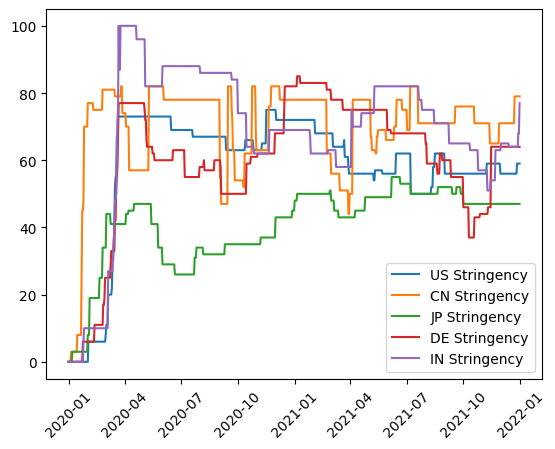

In [ ]:
%matplotlib inline
print("Stringency Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["stringency_index"], label = "US Stringency")
plt.plot(CHINA["date"], CHINA["stringency_index"], label = "CN Stringency")
plt.plot(JAPAN["date"], JAPAN["stringency_index"],label = 'JP Stringency')
plt.plot(GERMANY["date"], GERMANY["stringency_index"], label = 'DE Stringency')
plt.plot(INDIA["date"], INDIA["stringency_index"], label = 'IN Stringency')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


##### Cases Graph

Cases Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: 


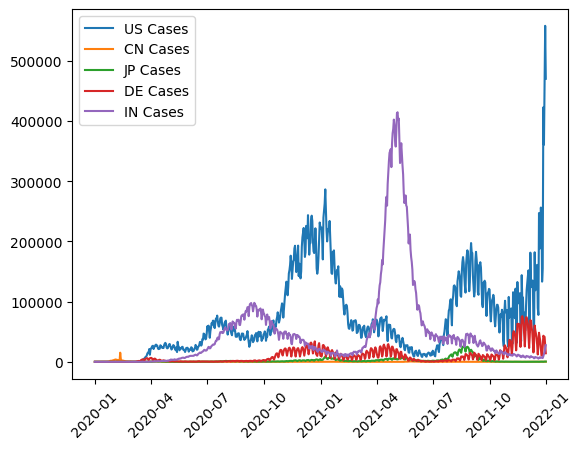

In [ ]:
%matplotlib inline
print("Cases Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["new_confirmed"], label = "US Cases")
plt.plot(CHINA["date"], CHINA["new_confirmed"], label = "CN Cases")
plt.plot(JAPAN["date"], JAPAN["new_confirmed"],label = 'JP Cases')
plt.plot(GERMANY["date"], GERMANY["new_confirmed"], label = 'DE Cases')
plt.plot(INDIA["date"], INDIA["new_confirmed"], label = 'IN Cases')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


##### Deaths Graph



Deaths Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: 


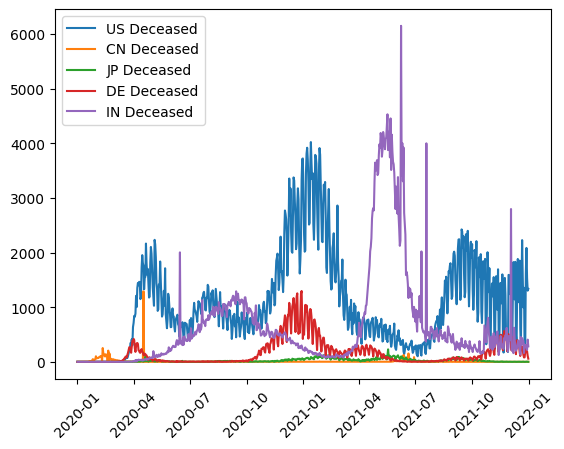

In [ ]:
%matplotlib inline
print("Deaths Over Time Across Top 5 GDP Countries 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["new_deceased"], label = "US Deceased")
plt.plot(CHINA["date"], CHINA["new_deceased"], label = "CN Deceased")
plt.plot(JAPAN["date"], JAPAN["new_deceased"],label = 'JP Deceased')
plt.plot(GERMANY["date"], GERMANY["new_deceased"], label = 'DE Deceased')
plt.plot(INDIA["date"], INDIA["new_deceased"], label = 'IN Deceased')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Findings: Stringency, Cases, Deaths
+ Of the subset of 5 countries, most had their stringency score rapidly increase or peak in April of 2020, right when the pandemic really took effect globally. Around this same time we see cases and deaths peak for the first time for those countries as well
+ The United States and India had high and volatile cases and deaths. India took action immediately in April, having extremely high stringency scores, but cases and deaths continued to climb for India into Summer and Fall of 2020 despite strict measures.
+ The US had extremely high case and death counts, but still failed to impose the most stringent measures. The US responded quickly like other countries in April, but stringency began to decline and flatten out, despite having major spikes in cases and deaths in Winter of 2020 and Summer of 2021.
+ China had the most stringent measures overall, and had relatively low cases. China's cases were also less volatile compared to the others after the initial spike in the pandemic.
+ Germany or DE had volatile changes in its overall policy and stringency score, with it's stringency dipping to the lowest point of the 5 in October of 2021.
+ We see major peaks in cases and deaths in Summer of 2021 for several countries with the emergence of new variants, not protected by some of the inital vaccines. 
+ More stringent measures are effective ways of controlling the spread of the new virus, but more information is needed about specific policies to understand how long it takes to see a change in cases and deaths.


### Q2

For question 2 after viewing some of the policies of countries in question 1 and their relative cases, we wanted to investigate some of the most contentious policies across different countries and determine their effectiveness. We decided to study the effectiveness and frequency of mask mandates (facial_coverings), stay at home requirements (stay_at_home_requirements), as well as international travel restrictions (international_travel_controls).

Background and Level code: 

+ Facial Coverings Policy
 + 0- No policy
 + 1- Recommended
 + 2- Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible
 + 3- Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible
 + 4- Required outside the home at all times, regardless of location or presence of other people

+ Stay At Home Requirements Policy
  + 0 - No measures
  + 1 - recommend not leaving house
  + 2 - require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips
  + 3 - Require not leaving house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)
  + No data - blank

+ International Travel Controls Policy
  + 0 - No measures
  + 1 - Screening
  + 2 - Quarantine arrivals from high-risk regions
  + 3 - Ban on high-risk regions
  + 4 - Total border closure
  + No data - blank



#### Select US facial covering policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, facial_coverings, count(facial_coverings)
FROM us_policy
GROUP BY facial_coverings,location_key
ORDER BY facial_coverings;

 * postgresql://student@/Final
5 rows affected.


location_key,facial_coverings,count
US,0,69
US,1,25
US,2,2
US,3,394
US,4,241


Observations:
+ In 2020 and 2021, the US primarily had policy 3 and policy 4, occurring 86.86% of the time or 635 days of the 731 in the subset. Based on the data this matches what we expected as the US had several spikes in cases during 2020 and by 2021 the pandemic was still in full swing. It is surprising that only 2 times we saw policy 2, but policy 2 is extremely similar to policy 3 except not required in some cases. Likely policy 2 is captured in policy 1.

+ Percentage: 9% of the time with 0 policy, 3.4% of the time with 1 policy(recommended), 0.27% of the time with 2 policy (required in some public spaces), 54% of time with 3 policy (required in all public spaces with other people present), 33% of the time with 4 policy (required with all places outside home all the time).

<BarContainer object of 5 artists>

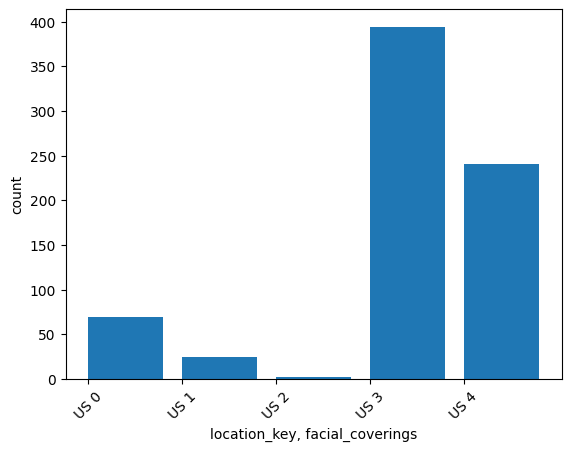

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select US stay at home requirements policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, stay_at_home_requirements, count(stay_at_home_requirements)
FROM us_policy
GROUP BY stay_at_home_requirements,location_key
ORDER BY stay_at_home_requirements;

 * postgresql://student@/Final
3 rows affected.


location_key,stay_at_home_requirements,count
US,0,74
US,1,409
US,2,248


Observations:
+ the main stay at home requirement for the US in the period of 2020-2021 was policy 1, followed by policy 2. Again, we expect that policy 1 would be the most frequent because it allows for leaving the house for essential trips. Given that the US had several conflicting opinions about pandemic safety, it is fitting that they would not have the most extreme, no leaving policy except for those days when there was serious lockdown. Combined together, the US had policy 1 and 2 or some restriction on stay at home 657 days of the 731 days or 89.87% of the time.

+ 10% of the time with 0 policy, 56%  of the time with 1 policy(recommended), 34% of the timewith 2 policy(mandatory).

<BarContainer object of 3 artists>

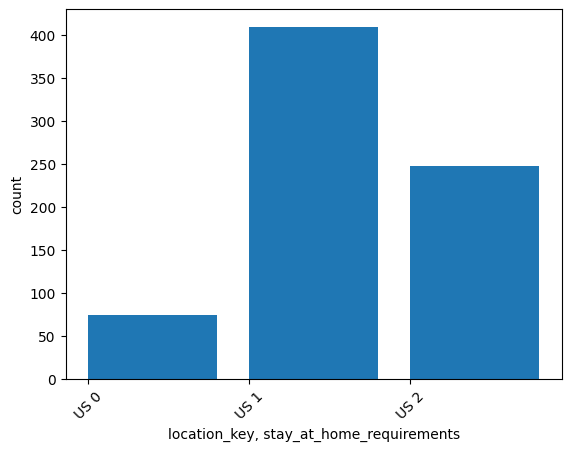

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select US international travel controls policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, international_travel_controls, count(international_travel_controls)
FROM us_policy
GROUP BY international_travel_controls,location_key
ORDER BY international_travel_controls;

 * postgresql://student@/Final
4 rows affected.


location_key,international_travel_controls,count
US,0,32
US,2,29
US,3,616
US,4,54


Observations:
+ The most frequent policy that the US invoked in this period for international travel restriction was policy 3, which was a ban on high risk regions which occurred 84.26% of the time. The US did typically not go to such extreme lengths as total border closures or policy 4, except for 54 days of the period. The US is consistently able to make policy changes that restrict movement to and from certain high risk regions, so this is expected. 

+ 4.4%% of the time with 0 policy, 4% of the time with 2 policy), 84% of the time with 3 policy, 7.4% of the time with 4 policy.

<BarContainer object of 4 artists>

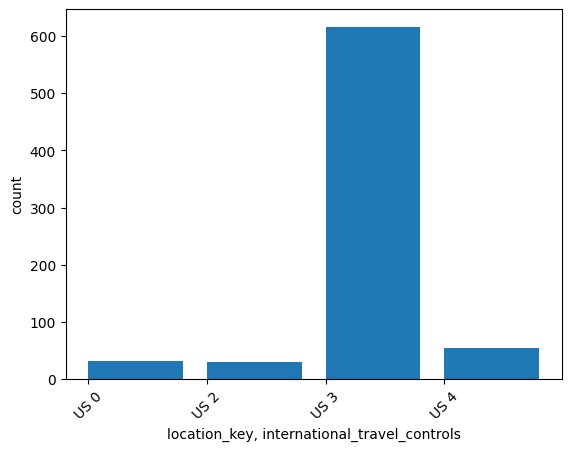

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select CN facial covering policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, facial_coverings, count(facial_coverings)
FROM cn_policy
GROUP BY facial_coverings,location_key
ORDER BY facial_coverings;

 * postgresql://student@/Final
4 rows affected.


location_key,facial_coverings,count
CN,1,20
CN,2,506
CN,3,62
CN,4,143


Observations:
+ One of the most surpising observations we found was that China most commonly invoked policy 2, which was required face coverings in specified public spaces or situations where distancing is not possible. Initially we expected that China would have the strictest policy, which is required at all times outside the home, but that was only the second most frequent policy. Again, we expect that policy 3 is covered in policy 2 or 4 so that explains why it occurred less frequently as policy changed rapidly. China had policy 2 506 days of the period or 69.22% of the time. It is possible that in China people are able to follow suggestions and recommendations, unlike the US which operated with great backlash to government measures--which is why they had to make requirements in law. One thing we hypothesized is that culturally in China people are more willing to follow guidelines, explaining why a less stringent policy did not have to be invoked.

+ 2.7% of the time with 1 policy (recommended), 69% of the time with 2 policy (required in some public spaces)), 8.5% of the time with 3 policy (required in all public spaces with other people present), 20% of the time with 4 policy (required with all places outside home all the time).

<BarContainer object of 4 artists>

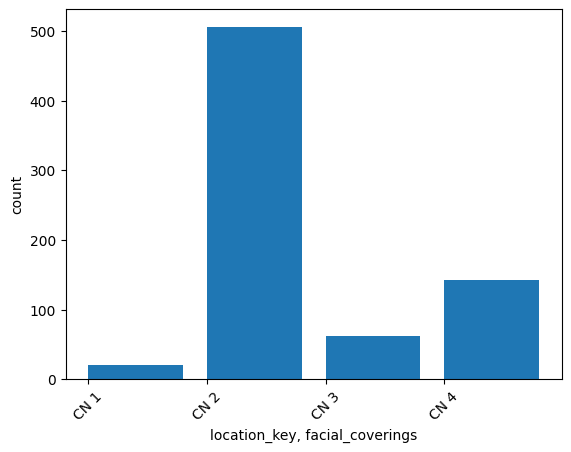

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select CN stay at home requirements policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, stay_at_home_requirements, count(stay_at_home_requirements)
FROM cn_policy
GROUP BY stay_at_home_requirements,location_key
ORDER BY stay_at_home_requirements;

 * postgresql://student@/Final
4 rows affected.


location_key,stay_at_home_requirements,count
CN,0,51
CN,1,93
CN,2,60
CN,3,527


Observations:
+ We found that China had policy 3, or the strictest stay at home policy the majority of the period of 2020 to 2021, occuring 527 days of the 731 or 73.46% of the time. China had strict guidelines in place with stay at home orders, and considering its large population, having rules like only one person leaving at a time is plausible.

+ 7% of the time with 0 policy, 12.7% of the time with 1 policy, 8.2% of the time with 2 policy, 72% of the time with 3 policy.

<BarContainer object of 4 artists>

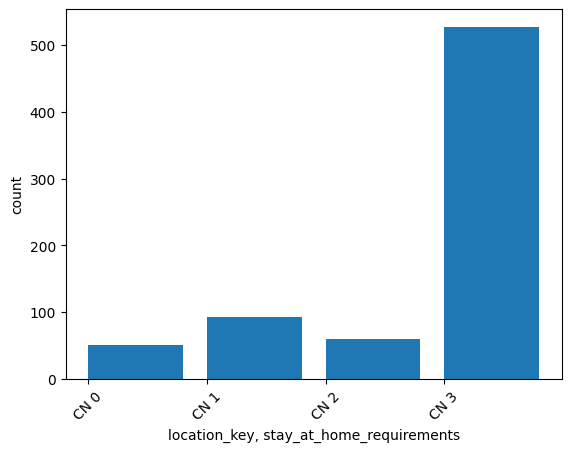

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select CN international travel controls policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, international_travel_controls, count(international_travel_controls)
FROM cn_policy
GROUP BY international_travel_controls,location_key
ORDER BY international_travel_controls;

 * postgresql://student@/Final
3 rows affected.


location_key,international_travel_controls,count
CN,0,55
CN,2,195
CN,3,481


Observations:
+ China most frequently had policy 3, 65.8% of the time, followed by policy 2 for international travel restrictions. COVID first appeared globally in China, so having tight border controls and travel restrictions might be an appropriate response as an attempt to control the spread of the virus. China also had spikes in cases fairly early on in the pandemic, prior to research and vaccines, so strict measures like total border closure make sense with fewer options in place.

+ 7.5% of the time with 0 policy, 26.7% of the time with 2 policy, 66% of the time with 3 policy.

<BarContainer object of 3 artists>

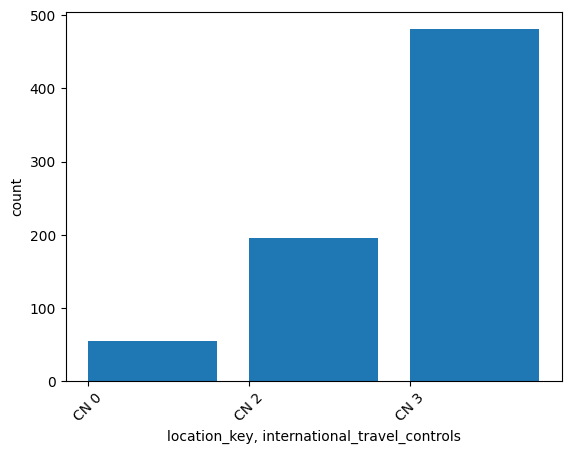

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select JP facial covering policies and plot bar chart


In [ ]:
%%sql
SELECT location_key, facial_coverings, count(facial_coverings)
FROM jp_policy
GROUP BY facial_coverings,location_key
ORDER BY facial_coverings;

 * postgresql://student@/Final
2 rows affected.


location_key,facial_coverings,count
JP,0,60
JP,1,671


Observations:
+ Japan had really interesting data which we recognized might have some problems with further analysis. Japan only had two possible policies, recommended face coverings or no policy. While this seems surprising, Japan actually has a long history of wearing masks ingrained in culture to prevent the spread of illness. We hypothesize that Japan had a "low strictness" policy because culturally it is already established to wear a mask to prevent the spread of a virus, so strict legal measures aren't required to enforce wearing masks.

+ 8% of the time with 0 policy, 92% of the time with 2 policy (recommended).

<BarContainer object of 2 artists>

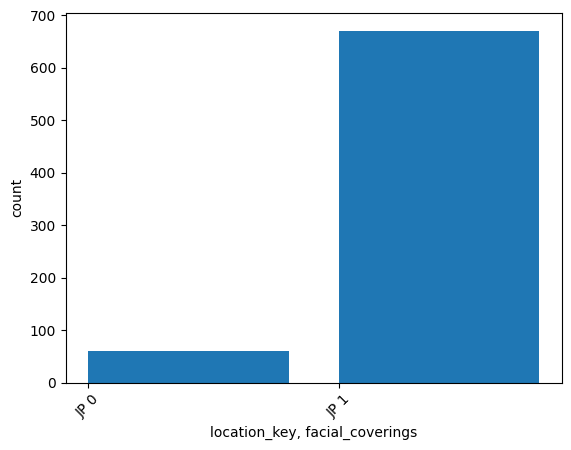

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select JP stay at home requirements policies and plot bar chart

In [ ]:
%%sql
SELECT location_key, stay_at_home_requirements, count(stay_at_home_requirements)
FROM jp_policy
GROUP BY stay_at_home_requirements,location_key
ORDER BY stay_at_home_requirements;

 * postgresql://student@/Final
2 rows affected.


location_key,stay_at_home_requirements,count
JP,0,156
JP,1,575


Obersvations:


+ We found that Japan had policy 1 stay at home policy the majority of the period of 2020 to 2021, occuring 575 days of the 731 or 79% of the time. Just like the facial mask policy, the government mostly recommended and did not adopt strict in-home requirements.


+ 21% of the time with 0 policy, 79% of the time with 1 policy.

<BarContainer object of 2 artists>

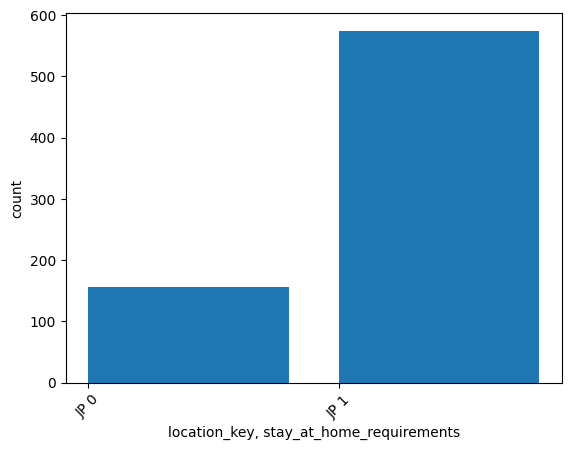

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select JP international travel controls policies and plot bar chart

In [ ]:
%%sql
SELECT location_key, international_travel_controls, count(international_travel_controls)
FROM jp_policy
GROUP BY international_travel_controls,location_key
ORDER BY international_travel_controls;

 * postgresql://student@/Final
5 rows affected.


location_key,international_travel_controls,count
JP,0,6
JP,1,25
JP,2,25
JP,3,306
JP,4,369


Observations:
+ Japan had strict policies for international travel, either fully closing borders or restricting certain risk zones. Being a smaller location geographically speaking, Japan has the capability to fully close borders.

+ 0.08% of the time with 0 policy, 3.4%  of the time with 1 policy, 3.4%  of the time with 2 policy, 42%  of the time with 3 policy, 50% of the time with  with 4 policy.

<BarContainer object of 5 artists>

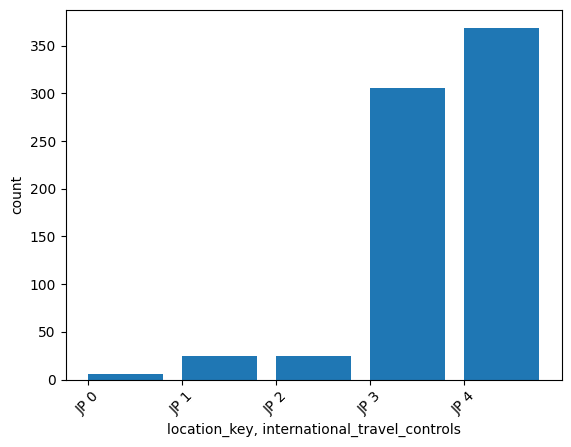

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

Conclusion:
+ We concluded that Japan did not take strict policies of facial mask and stay at home which were only recommended, but for international travel controls, it took strict policy which makes sense because the initial COVID was spreaded from other countries.

#### Select DE facial covering policies and plot bar chart



In [ ]:
%%sql
SELECT location_key, facial_coverings, count(facial_coverings)
FROM de_policy
GROUP BY facial_coverings,location_key
ORDER BY facial_coverings;

 * postgresql://student@/Final
3 rows affected.


location_key,facial_coverings,count
DE,0,91
DE,1,5
DE,2,635


Observations:
+ Germany had policy 2 most consistently, about 86.8%, requiring masks in some places or in cases when distancing is not possible. Interestingly enough, Germany did not invoke policy 3 or 4 which is more stringent. However, there are only slight nuanced differences between policy 2,3,4 as in all cases masks are required in some capacity vs. policy 1 which is recommended. They might not have invoked those other policies due to the phrasing of their country's policy.

+ 12.4% of the time with 0 policy, 0.7% of the time with 1 policy （recommended）, 87% of the time with 2 policy (required in some public spaces).

<BarContainer object of 3 artists>

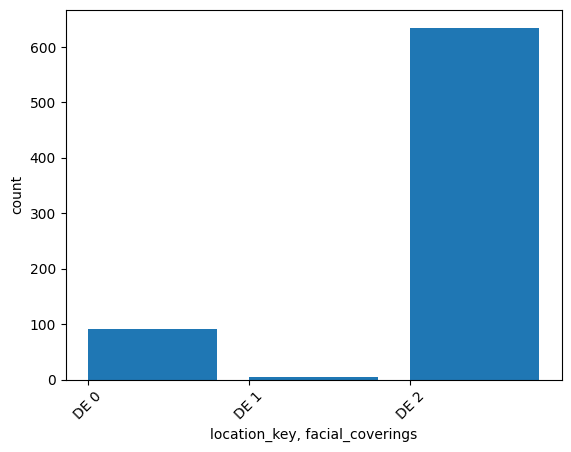

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select DE stay at home requirements policies and plot bar chart




In [ ]:
%%sql
SELECT location_key, stay_at_home_requirements, count(stay_at_home_requirements)
FROM de_policy
GROUP BY stay_at_home_requirements,location_key
ORDER BY stay_at_home_requirements;

 * postgresql://student@/Final
3 rows affected.


location_key,stay_at_home_requirements,count
DE,0,266
DE,1,189
DE,2,276


Observations:
+ Germany differed from the other countries with respect to its stay at home policies. Germany had no policy almost as much as it had required stay at home measures. This contributes to Germany's overall stringency being less than places like China which had strict policies for staying at home.

+ 36% of the time with 0 policy, 26% of the time with 1 policy, 38% of the time with 2 policy

<BarContainer object of 3 artists>

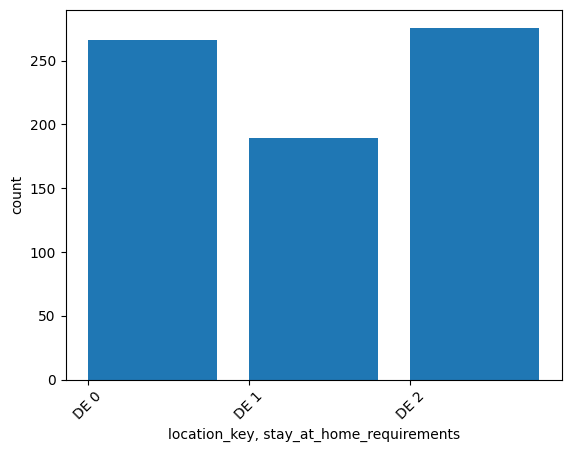

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select DE international travel controls policies and plot bar chart



In [ ]:
%%sql
SELECT location_key, international_travel_controls, count(international_travel_controls)
FROM de_policy
GROUP BY international_travel_controls,location_key
ORDER BY international_travel_controls;

 * postgresql://student@/Final
5 rows affected.


location_key,international_travel_controls,count
DE,0,58
DE,1,17
DE,2,153
DE,3,444
DE,4,59


Observations: 
+ Germany, like the US primarily had policy 3 which was banned international travel from high risk zones. Their policies seem fairly similar to what the US invoked for these three categories.

+ 8% of the time with 0 policy, 2.3% of the time with 1 policy, 21% of the time with 2 policy, 61% of the time with 3 policy, 8.1% of the time with 4 policy.

<BarContainer object of 5 artists>

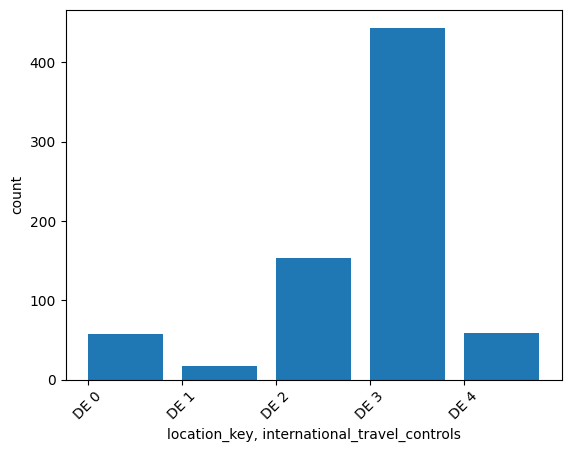

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select IN facial covering policies and plot bar chart




In [ ]:
%%sql
SELECT location_key, facial_coverings, count(facial_coverings)
FROM in_policy
GROUP BY facial_coverings,location_key
ORDER BY facial_coverings;

 * postgresql://student@/Final
4 rows affected.


location_key,facial_coverings,count
IN,0,92
IN,1,7
IN,2,18
IN,4,614


Observations:
+ India had the strictest facial coverings policy for the majority of the time period, about 83.99% of the time. For countries with high populations and with people in close proximity, having stringent face covering policies are key in helping limit the spread of the virus. Likely India had to impose the strict policy because social distancing can be challenging in places where people live in close quarters.

+ 12.6% of the time with 0 policy, 0.96% of the time with 1 policy （recommended）, 2.5% of the time with 2 policy (required in some public spaces), 84% of the time with 4 policy (required with all places outside home all the time).

<BarContainer object of 4 artists>

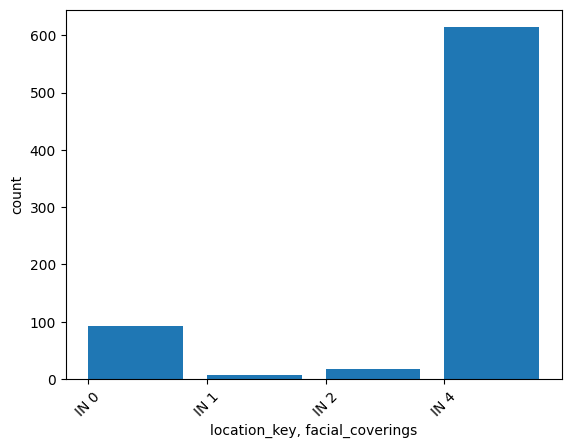

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select IN stay at home requirements policies and plot bar chart




In [ ]:
%%sql
SELECT location_key, stay_at_home_requirements, count(stay_at_home_requirements)
FROM in_policy
GROUP BY stay_at_home_requirements,location_key
ORDER BY stay_at_home_requirements;

 * postgresql://student@/Final
4 rows affected.


location_key,stay_at_home_requirements,count
IN,0,25
IN,1,56
IN,2,431
IN,3,219


Observations:
+ India also utilized strict stay at home requirements, implementing policy 2 and 3 most often or 88.91% of the time. 

+ 3.4% of the time with 0 policy, 7.7% of the time with 1 policy, 59% of the time with 2 policy, 30% of the time with 3 policy.



<BarContainer object of 4 artists>

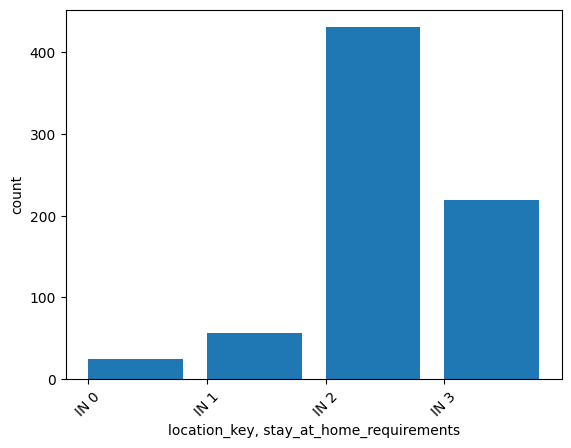

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

#### Select IN international travel controls policies and plot bar chart




In [ ]:
%%sql
SELECT location_key, international_travel_controls, count(international_travel_controls)
FROM in_policy
GROUP BY international_travel_controls,location_key
ORDER BY international_travel_controls;

 * postgresql://student@/Final
5 rows affected.


location_key,international_travel_controls,count
IN,0,25
IN,1,47
IN,2,83
IN,3,357
IN,4,219


Observations:
+ India also utilized strict international travel controls requirements, implementing policy 3 and 4 most often or 79% of the time. 

+  3.5% of the tiem with 0 policy, 6.4% of the time with 1 policy, 11.4% of the timne with 2 policy, 49% of the time with 3 policy, 30% of the time with 4 policy.


<BarContainer object of 5 artists>

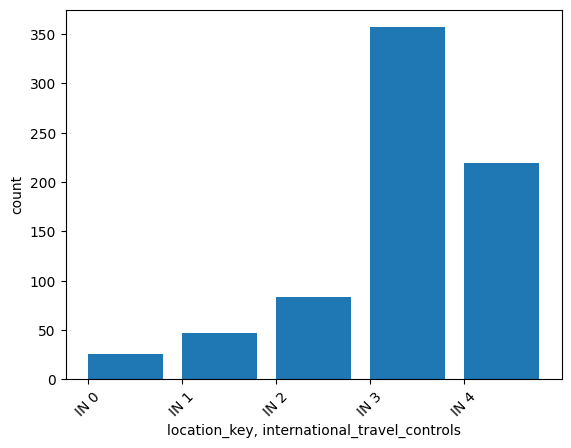

In [ ]:
%matplotlib inline
_ . bar ( width = 0.8 , align = 'edge' )

##### Plot the line graph showing how Face Coverings, stay at home orders, international travel restrictions points change over time


INDIA Three Policies Over Time 01-01-2020 to 12-31-2021: 


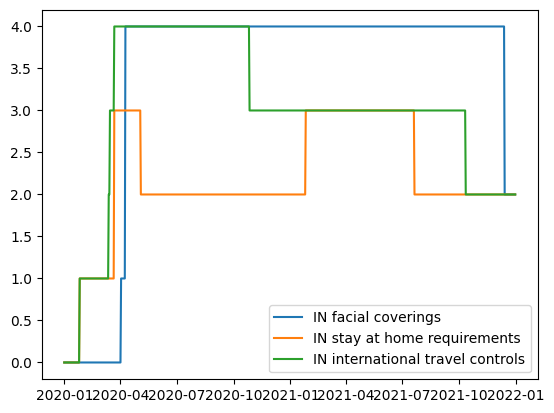

In [ ]:
%matplotlib inline
print("Facial Coverings Over Time 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["facial_coverings"], label = "US")
plt.plot(CHINA["date"], CHINA["facial_coverings"], label = "CN")
plt.plot(JAPAN["date"], JAPAN["facial_coverings"], label = "JP")
plt.plot(GERMANY["date"], GERMANY["facial_coverings"], label = "DE")
plt.plot(INDIA["date"], INDIA["facial_coverings"], label = "IN")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Observations:
+ 

In [ ]:
%matplotlib inline
print("Stay At Home Requirements Over Time 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["stay_at_home_requirements"], label = "US")
plt.plot(CHINA["date"], CHINA["stay_at_home_requirements"], label = "CN")
plt.plot(JAPAN["date"], JAPAN["stay_at_home_requirements"], label = "JP")
plt.plot(GERMANY["date"], GERMANY["stay_at_home_requirements"], label = "DE")
plt.plot(INDIA["date"], INDIA["stay_at_home_requirements"], label = "IN")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
%matplotlib inline
print("International Travel Controls Over Time 01-01-2020 to 12-31-2021: ")
plt.plot(USA["date"], USA["international_travel_controls"], label = "US")
plt.plot(CHINA["date"], CHINA["international_travel_controls"], label = "CN")
plt.plot(JAPAN["date"], JAPAN["international_travel_controls"], label = "JP")
plt.plot(GERMANY["date"], GERMANY["international_travel_controls"], label = "DE")
plt.plot(INDIA["date"], INDIA["international_travel_controls"], label = "IN")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Q3

What is the relationship of vaccination rates and number of hospitalizations? How does vaccination policy plays a role in these rates?

In [ ]:
%%sql
select * 
from covid
limit 10

#### Find top 5 gdp countries have vaccination policy = 5 

In [ ]:
%%sql
select distinct country_code, gdp_usd
from covid 
where vaccination_policy = '5'
and gdp_usd is not null
and subregion1_code is null
group by country_code, gdp_usd
order by gdp_usd desc
limit 5

 * postgresql://student@/Final
5 rows affected.


country_code,gdp_usd
US,21374418877706
CN,14342902842915
JP,5081769542379
DE,3946356600000
IN,2875142314811


Observation: In this section we grouped the top 5 countries based on their GDP levels to create a particular niche for our analysis. The 5 countries means we will be able to understand the dynamics of different vaccination policies and the outcomes they had on the variables/facts of interest.

In [ ]:
%%sql
DROP TABLE IF EXISTS vac_policy; 
CREATE TABLE vac_policy AS 
select *
From covid
where country_code = 'US'
or country_code = 'CN'
or country_code = 'JP'
or country_code = 'DE'
or country_code = 'IN'

 * postgresql://student@/Final
Done.
2762727 rows affected.


[]

#### Pick specific countries to see the vaccination policy changes by time

##### US

In [ ]:
%%sql US_vac <<
select distinct date, avg(vaccination_policy) as avg_vac_policy
from covid 
where country_code = 'US'
and vaccination_policy is not null
group by date
order by date asc

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable US_vac


##### CN

In [ ]:
%%sql CN_vac <<
select distinct date, avg(vaccination_policy) as avg_vac_policy
from covid 
where country_code = 'CN'
and vaccination_policy is not null
group by date
order by date asc

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable CN_vac


##### JP

In [ ]:
%%sql JP_vac <<
select distinct date, avg(vaccination_policy) as avg_vac_policy
from covid 
where country_code = 'JP'
and vaccination_policy is not null
group by date
order by date asc

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable JP_vac


##### DE

In [ ]:
%%sql DE_vac <<
select distinct date, avg(vaccination_policy) as avg_vac_policy
from covid 
where country_code = 'DE'
and vaccination_policy is not null
group by date
order by date asc

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable DE_vac


##### IN

In [ ]:
%%sql IN_vac <<
select distinct date, avg(vaccination_policy) as avg_vac_policy
from covid 
where country_code = 'IN'
and vaccination_policy is not null
group by date
order by date asc

 * postgresql://student@/Final
731 rows affected.
Returning data to local variable IN_vac


In [ ]:
US_vac = US_vac.DataFrame()
CN_vac = CN_vac.DataFrame()
JP_vac = JP_vac.DataFrame()
DE_vac = DE_vac.DataFrame()
IN_vac = IN_vac.DataFrame()

#### Visualization to show the vaccination policy change

Five country's Vaccination Policy change


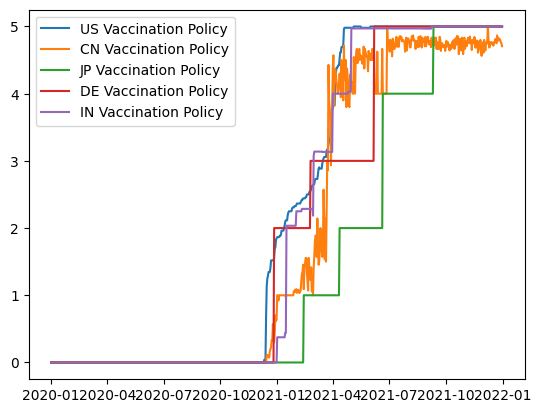

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("Five country's Vaccination Policy change")
plt.plot(US_vac["date"], US_vac["avg_vac_policy"], label = "US Vaccination Policy")
plt.plot(CN_vac["date"], CN_vac["avg_vac_policy"], label = "CN Vaccination Policy")
plt.plot(JP_vac["date"], JP_vac["avg_vac_policy"], label = "JP Vaccination Policy")
plt.plot(DE_vac["date"], DE_vac["avg_vac_policy"], label = "DE Vaccination Policy")
plt.plot(IN_vac["date"], IN_vac["avg_vac_policy"], label = "IN Vaccination Policy")

plt.legend()
plt.show()

**Observations:** In this section, our analysis was set on identifying how each country's vaccination policty changed overtime. The purpose for this was to be able to understand how changes impacted the hospitalization rates. In this case we observe that all countries introduced their first vaccine policy around November 2021. Given certain changes on the pandemic over time, nations shifted their policies until universal access access was achieved at level 5. China observed shifts in policy as demosntrated in the graph and this is attributed to how different regions in the country had different vaccination policies on different points in time. From the graph we noted that the US was the first to achieve universal access and Japan was the last to achieve universal access. We will later observe how these changes impacted hospitalizations after enacting each stage of the vaccination policy.

#### CN

In [ ]:
%%sql
DROP TABLE IF EXISTS CN; 
CREATE TABLE CN AS 
select *
From covid
where country_code = 'CN'

 * postgresql://student@/Final
Done.
8985 rows affected.


[]

In [ ]:
%%sql
select *
From CN
limit 5

 * postgresql://student@/Final
5 rows affected.


date,location_key,new_confirmed,new_deceased,new_recovered,country_code,country_name,subregion1_code,subregion1_name,population,population_male,population_female,new_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,current_ventilator_patients,new_persons_vaccinated,new_persons_fully_vaccinated,new_vaccine_doses_administered,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,gdp_usd,life_expectancy,smoking_prevalence,diabetes_prevalence,adult_male_mortality_rate,adult_female_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,date_key,loc_key,gov_key
2020-04-01,CN_NM,4,0,0,CN,China,NM,Inner Mongolia,24049155,13920292,12836861,None,None,None,None,None,None,None,None,None,2,2,1,0,1,1,1,4,0,2,0,0,2,2,2,0,0,2,0,57,1735980000000,None,None,None,None,None,None,None,None,354,6960,7655
2020-03-26,CN_SD,2,0,0,CN,China,SD,Shandong,101527453,51700955,50686120,None,None,None,None,None,None,None,None,None,3,2,2,1,2,3,1,2,1,2,0,0,2,2,2,0,0,3,0,69,7312900000000,None,None,None,None,None,None,None,None,582,6964,12144
2020-04-02,CN_FJ,0,0,2,CN,China,FJ,Fujian,41540086,21147083,19905866,None,None,None,None,None,None,None,None,None,2,2,2,4,0,1,1,4,0,2,0,0,2,2,2,0,0,2,0,69,4390390000000,None,None,None,None,None,None,None,None,310,6945,8952
2020-03-18,CN_GZ,-1,0,0,CN,China,GZ,Guizhou,38562148,17758004,16733443,None,None,None,None,None,None,None,None,None,2,3,2,4,1,2,1,2,1,2,0,0,2,2,2,0,0,2,0,74,None,None,None,None,None,None,None,None,None,567,6949,10142
2020-03-29,CN_JS,3,0,0,CN,China,JS,Jiangsu,84748016,42459271,41581494,None,None,None,None,None,None,None,None,None,1,2,2,3,1,1,2,4,1,2,0,0,2,2,2,0,0,2,0,73,10271900000000,None,None,None,None,None,None,None,None,537,6957,5292


In [ ]:
%%sql
select min(population), max(population), avg(population)
From CN
limit 5

 * postgresql://student@/Final
1 rows affected.


min,max,avg
3648100,1439323774,165487306.12309405


In [ ]:
%%sql
select min(gdp_usd), max(gdp_usd), avg(gdp_usd)
From CN
limit 5

 * postgresql://student@/Final
1 rows affected.


min,max,avg
140837,14342902842915,4930022142830.5554


#### See the vaccination rate and hospitalization rate changes by the policy changes

##### US

In [ ]:
%%sql
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'US' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'US'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'US'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
6 rows affected.


vaccination_policy,new_vaccinated_rate,fully_vaccinated_rate,hospitalization_rate
0,0,None,7
1,16,8,7
2,25,14,7
3,28,20,8
4,8,9,9
5,65,71,7


### **Observations**
In this section, the objective was to analyze how vaccination policy impacted, rate of new people getting vaccinated and the hospitalization rate from the United States populution. The results show that vaccine policy 4 had the lowest rate for new fully vaccinated individuals in the population and corresponded with the highest hospitalization rate from the data. Vaccine policy 5 had the highest rate of vaccination and led to a 2% reduction in the hospitalization rate. However, it is clear that the rate of vaccination has a weak negative relationship on the hospitalization. However, by generally observing changes in the hospitalization rate, vaccination policy alone had a minimal impact on the hospitalization rate since the rate seems stagnant and fluctuating around 7% in the USA.

### **Recommended Actions**
From this table, if the goal of the US government is to minimize hospitalizations, then focusing on vaccine policy alone will not be effective since its impact is very minimal (stuck at 7%) on affecting hospitalizations. However, a relationship does exist between vaccine policy and hospitalizations so the governnment may want to include othe factors to have a bigger impact. However, to maximise vaccine uptake, then implementing policy 5 (Universal availability) would be ideal depending on resource availability.

##### CN

In [ ]:
%%sql
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'CN' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'CN'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'CN'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
5 rows affected.


vaccination_policy,new_vaccinated_rate,fully_vaccinated_rate,hospitalization_rate
0,None,None,None
1,None,None,None
2,None,None,None
4,0,None,None
5,44,29,None


### **Observations**
The data for China's uptake on vaccines and its impact on the nation's hospitlization rata was unavailable in the dataset used. Explanation for this would be that our dataset was sourced from Google which is barred from use in China and hence we were not able to analyze the impact of the nation's vaccinatin policy.

### **Recommendations**
In this section there is need to collect more data on China's vaccination policy and analyse its impact on the nation's hospitalizations.

In [ ]:
%%sql
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'JP' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'JP'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'JP'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
5 rows affected.


vaccination_policy,new_vaccinated_rate,fully_vaccinated_rate,hospitalization_rate
0,None,None,1046
1,0,0,1058
2,20,8,1255
4,43,43,930
5,15,26,1688


### **Observations**


In [ ]:
%%sql
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'DE' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'DE'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'DE'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
4 rows affected.


vaccination_policy,new_vaccinated_rate,fully_vaccinated_rate,hospitalization_rate
0,None,None,None
2,4,2,None
3,42,19,None
5,29,49,None


In [ ]:
%%sql
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'IN' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'IN'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'IN'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
6 rows affected.


vaccination_policy,new_vaccinated_rate,fully_vaccinated_rate,hospitalization_rate
0,None,None,None
1,None,None,None
2,1,0,None
3,6,0,None
4,39,12,None
5,63,52,None


In [ ]:
%%sql
select distinct vaccination_policy, avg(stringency_index),
sum(new_hospitalized_patients), sum(new_confirmed)
from vac_policy
where country_code = 'JP'
and vaccination_policy is not null
group by subregion1_code, vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
5 rows affected.


vaccination_policy,avg,sum,sum_1
0,34.3545232273838631,4313487,412222
1,45.7413793103448276,980697,92658
2,49.4571428571428571,3488311,277836
4,51.1341463414634146,7847943,843080
5,47.6964285714285714,1711612,101347


In [ ]:
%%sql US_vac_rate <<
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'US' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'US'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'US'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
6 rows affected.
Returning data to local variable US_vac_rate


In [ ]:
US_vac_rate = US_vac_rate.DataFrame()

In [ ]:
%%sql CN_vac_rate <<
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'CN' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'CN'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'CN'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
5 rows affected.
Returning data to local variable CN_vac_rate


In [ ]:
CN_vac_rate = CN_vac_rate.DataFrame()

In [ ]:
%%sql JP_vac_rate <<
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'JP' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'JP'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'JP'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
5 rows affected.
Returning data to local variable JP_vac_rate


In [ ]:
JP_vac_rate = JP_vac_rate.DataFrame()

In [ ]:
%%sql DE_vac_rate <<
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'DE' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'DE'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'DE'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
4 rows affected.
Returning data to local variable DE_vac_rate


In [ ]:
DE_vac_rate = DE_vac_rate.DataFrame()

In [ ]:
%%sql IN_vac_rate <<
select distinct vaccination_policy, 
(sum(new_persons_vaccinated)*100/(select distinct population from vac_policy where country_code = 'IN' 
                                  and subregion1_code is null)) as new_vaccinated_rate,
(sum(new_persons_fully_vaccinated)*100/(select distinct population from vac_policy where country_code = 'IN'
                                        and subregion1_code is null)) as fully_vaccinated_rate,
(sum(new_hospitalized_patients)*100/sum(new_confirmed)) as hospitalization_rate
from vac_policy
where country_code = 'IN'
and vaccination_policy is not null
group by vaccination_policy
order by vaccination_policy

 * postgresql://student@/Final
6 rows affected.
Returning data to local variable IN_vac_rate


In [ ]:
IN_vac_rate = IN_vac_rate.DataFrame()

US Vaccination Policy Condition (%)


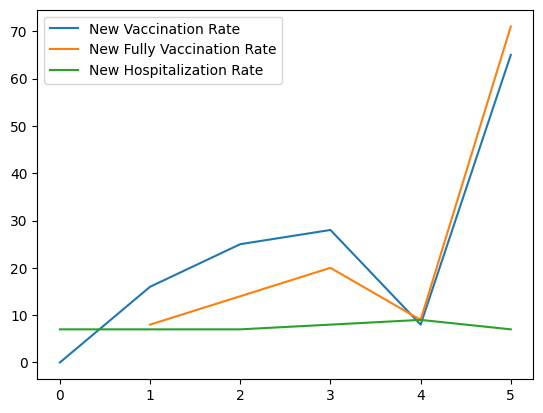

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("US Vaccination Policy Condition (%)")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["new_vaccinated_rate"], label = "New Vaccination Rate")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["fully_vaccinated_rate"], label = "New Fully Vaccination Rate")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["hospitalization_rate"], label = "New Hospitalization Rate")
plt.legend()
plt.show()

CN Vaccination Policy Condition (%)


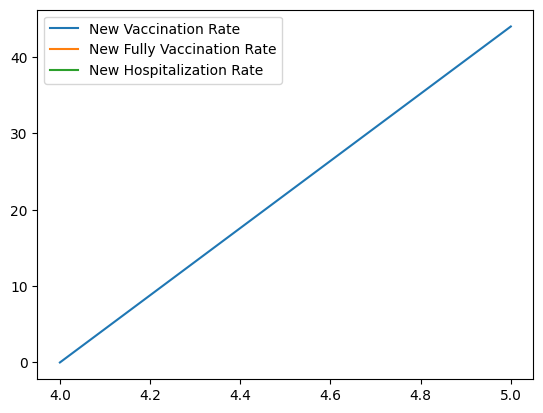

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("CN Vaccination Policy Condition (%)")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["new_vaccinated_rate"], label = "New Vaccination Rate")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["fully_vaccinated_rate"], label = "New Fully Vaccination Rate")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["hospitalization_rate"], label = "New Hospitalization Rate")
plt.legend()
plt.show()

JP Vaccination Policy Condition (%)


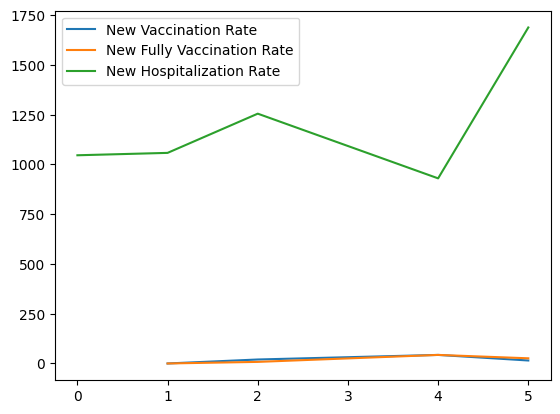

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("JP Vaccination Policy Condition (%)")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["new_vaccinated_rate"], label = "New Vaccination Rate")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["fully_vaccinated_rate"], label = "New Fully Vaccination Rate")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["hospitalization_rate"], label = "New Hospitalization Rate")
plt.legend()
plt.show()

DE Vaccination Policy Condition (%)


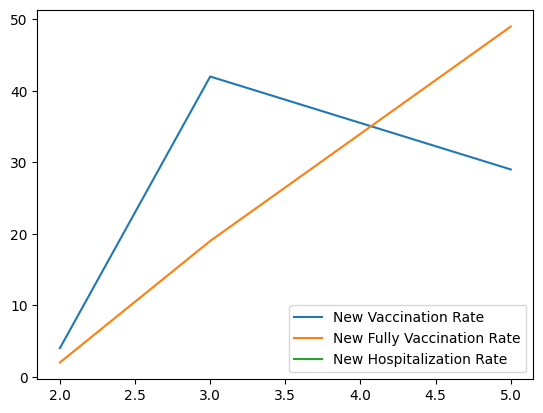

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("DE Vaccination Policy Condition (%)")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["new_vaccinated_rate"], label = "New Vaccination Rate")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["fully_vaccinated_rate"], label = "New Fully Vaccination Rate")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["hospitalization_rate"], label = "New Hospitalization Rate")
plt.legend()
plt.show()

IN Vaccination Policy Condition (%)


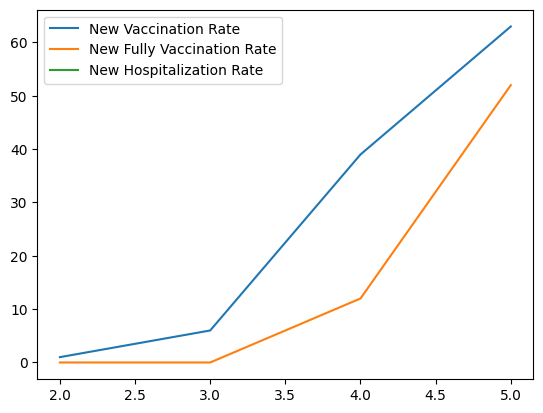

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("IN Vaccination Policy Condition (%)")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["new_vaccinated_rate"], label = "New Vaccination Rate")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["fully_vaccinated_rate"], label = "New Fully Vaccination Rate")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["hospitalization_rate"], label = "New Hospitalization Rate")
plt.legend()
plt.show()

Five Countries' New Vaccination Rate Change Based on Vaccination Policy Condition (%)


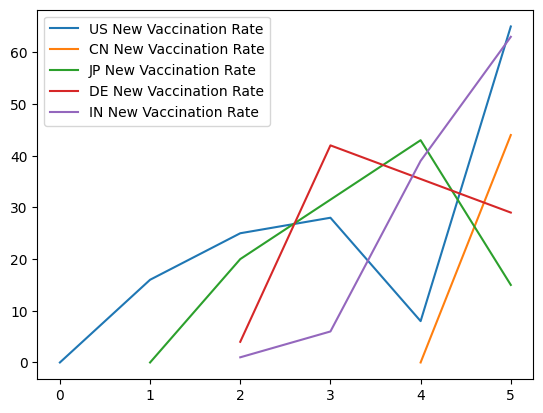

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("Five Countries' New Vaccination Rate Change Based on Vaccination Policy Condition (%)")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["new_vaccinated_rate"], label = "US New Vaccination Rate")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["new_vaccinated_rate"], label = "CN New Vaccination Rate")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["new_vaccinated_rate"], label = "JP New Vaccination Rate")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["new_vaccinated_rate"], label = "DE New Vaccination Rate")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["new_vaccinated_rate"], label = "IN New Vaccination Rate")
plt.legend()
plt.show()

Five Countries' New Fully Vaccination Rate Change Based on Vaccination Policy Condition (%)


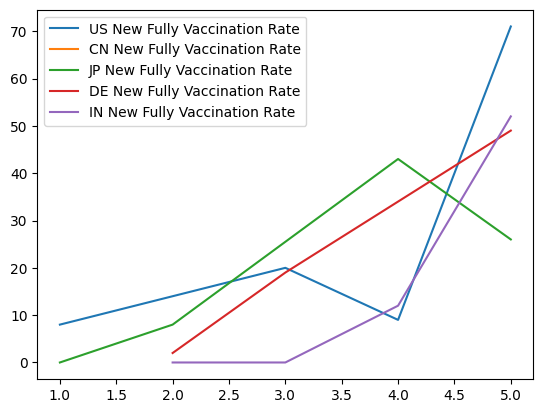

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("Five Countries' New Fully Vaccination Rate Change Based on Vaccination Policy Condition (%)")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["fully_vaccinated_rate"], label = "US New Fully Vaccination Rate")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["fully_vaccinated_rate"], label = "CN New Fully Vaccination Rate")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["fully_vaccinated_rate"], label = "JP New Fully Vaccination Rate")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["fully_vaccinated_rate"], label = "DE New Fully Vaccination Rate")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["fully_vaccinated_rate"], label = "IN New Fully Vaccination Rate")
plt.legend()
plt.show()

Five Countries' New Hospitalization Rate Change Based on Vaccination Policy Condition (%)


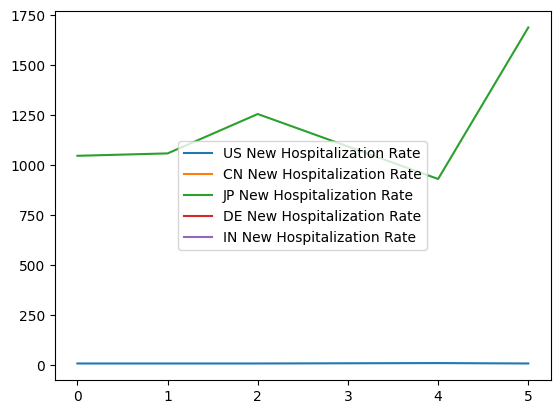

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

print ("Five Countries' New Hospitalization Rate Change Based on Vaccination Policy Condition (%)")
plt.plot(US_vac_rate["vaccination_policy"], US_vac_rate["hospitalization_rate"], label = "US New Hospitalization Rate")
plt.plot(CN_vac_rate["vaccination_policy"], CN_vac_rate["hospitalization_rate"], label = "CN New Hospitalization Rate")
plt.plot(JP_vac_rate["vaccination_policy"], JP_vac_rate["hospitalization_rate"], label = "JP New Hospitalization Rate")
plt.plot(DE_vac_rate["vaccination_policy"], DE_vac_rate["hospitalization_rate"], label = "DE New Hospitalization Rate")
plt.plot(IN_vac_rate["vaccination_policy"], IN_vac_rate["hospitalization_rate"], label = "IN New Hospitalization Rate")
plt.legend()
plt.show()